<a href="https://colab.research.google.com/github/PaolaTellez07/hyperblog/blob/main/ACA3_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'healthcare-dataset-stroke-data.xlsx'
df = pd.read_excel(file_path)
print(df.head(10))

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   
5  56669    Male  81.0             0              0          Yes   
6  53882    Male  74.0             1              1          Yes   
7  10434  Female  69.0             0              0           No   
8  27419  Female  59.0             0              0          Yes   
9  60491  Female  78.0             0              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private    

In [4]:
# Descripción general de los datos
print("\nDescripción general del dataset:")
print(df.describe(include='all'))
pd.set_option('display.float_format', '{:.2f}'.format)
#Información del dataset (tipos de datos, valores nulos, etc.)
print("n\nInformación del dataset:")
print(df.info())


Descripción general del dataset:
                  id  gender          age  hypertension  heart_disease  \
count    5110.000000    5110  5110.000000   5110.000000    5110.000000   
unique           NaN       3          NaN           NaN            NaN   
top              NaN  Female          NaN           NaN            NaN   
freq             NaN    2994          NaN           NaN            NaN   
mean    36517.829354     NaN    43.226614      0.097456       0.054012   
std     21161.721625     NaN    22.612647      0.296607       0.226063   
min        67.000000     NaN     0.080000      0.000000       0.000000   
25%     17741.250000     NaN    25.000000      0.000000       0.000000   
50%     36932.000000     NaN    45.000000      0.000000       0.000000   
75%     54682.000000     NaN    61.000000      0.000000       0.000000   
max     72940.000000     NaN    82.000000      1.000000       1.000000   

       ever_married work_type Residence_type  avg_glucose_level          bmi 

In [5]:
#Eliminar duplicados
df = df.drop_duplicates()

df['stroke'] = df['stroke'].astype(float)

print(df.dtypes)

print(df)

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke               float64
dtype: object
         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male 67.00             0              1          Yes   
1     51676  Female 61.00             0              0          Yes   
2     31112    Male 80.00             0              1          Yes   
3     60182  Female 49.00             0              0          Yes   
4      1665  Female 79.00             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female 80.00             1              0          Yes   
5106  44873  Female 81.00             0              0          Yes   

In [6]:
# Descripción general de los datos
print("\nDescripción general del dataset:")
print(df.describe(include='all'))
pd.set_option('display.float_format', '{:.2f}'.format)
#Información del dataset (tipos de datos, valores nulos, etc.)
print("n\nInformación del dataset:")
print(df.info())


Descripción general del dataset:
             id  gender     age  hypertension  heart_disease ever_married  \
count   5110.00    5110 5110.00       5110.00        5110.00         5110   
unique      NaN       3     NaN           NaN            NaN            2   
top         NaN  Female     NaN           NaN            NaN          Yes   
freq        NaN    2994     NaN           NaN            NaN         3353   
mean   36517.83     NaN   43.23          0.10           0.05          NaN   
std    21161.72     NaN   22.61          0.30           0.23          NaN   
min       67.00     NaN    0.08          0.00           0.00          NaN   
25%    17741.25     NaN   25.00          0.00           0.00          NaN   
50%    36932.00     NaN   45.00          0.00           0.00          NaN   
75%    54682.00     NaN   61.00          0.00           0.00          NaN   
max    72940.00     NaN   82.00          1.00           1.00          NaN   

       work_type Residence_type  avg_gluc

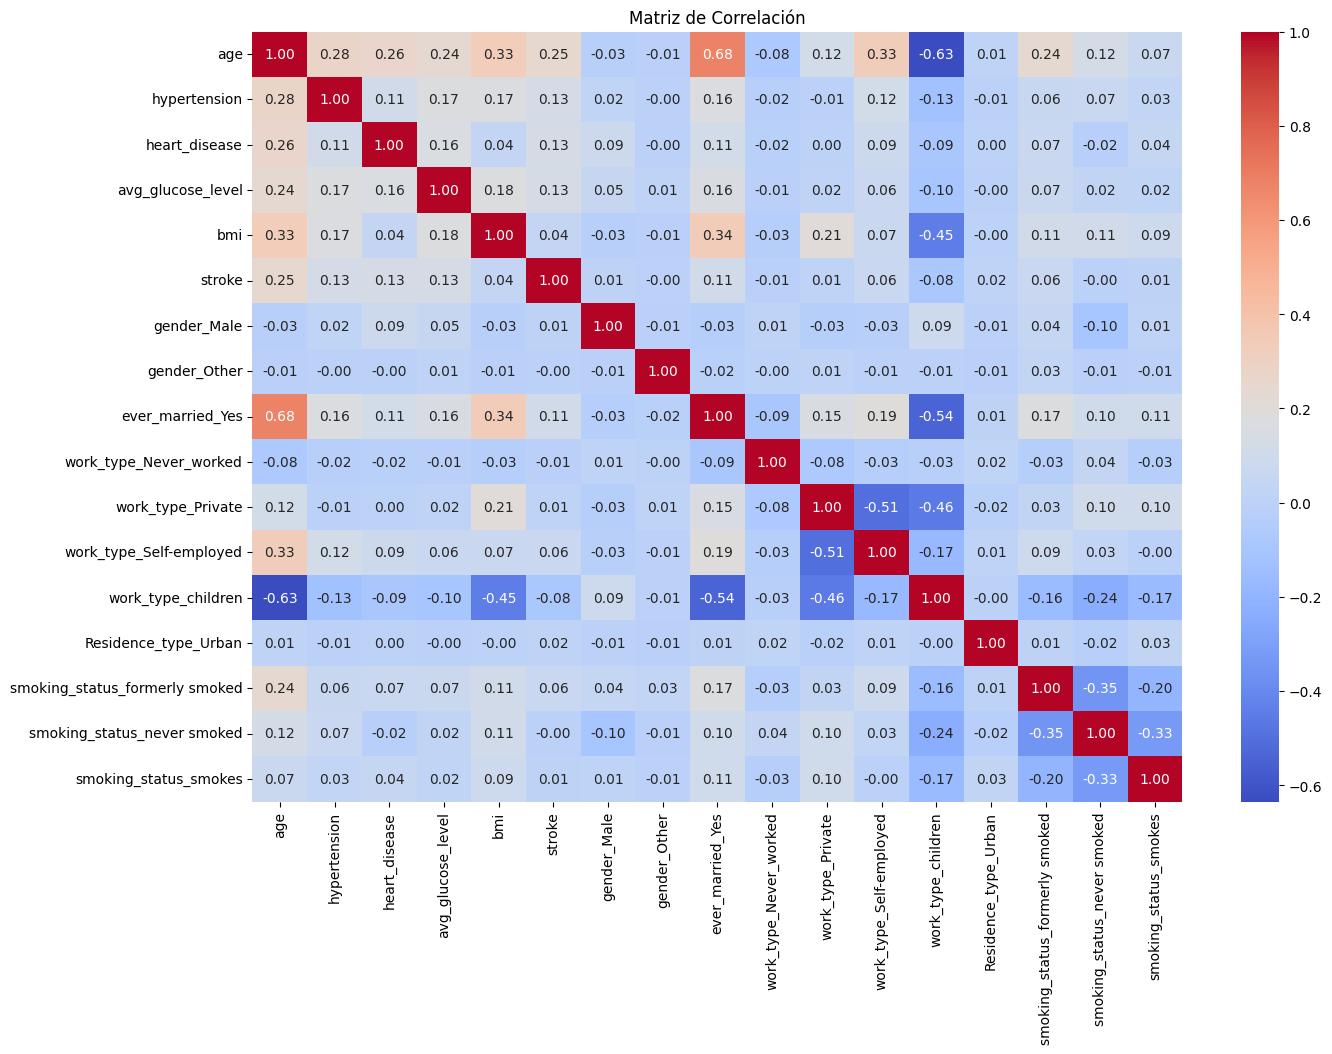

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#Seleccionar las columnas específicas para la matriz de correlación
variables_seleccionadas = ['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status','stroke']

# Subset the DataFrame
subset_df = df[variables_seleccionadas]

# Perform one-hot encoding on categorical columns
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
encoded_df = pd.get_dummies(subset_df, columns=categorical_cols, drop_first=True) # drop_first to avoid multicollinearity

#Crear la matriz de correlación using the encoded DataFrame
plt.figure(figsize=(15, 10)) # Adjust figure size as needed
sns.heatmap(encoded_df.corr(), annot=True, cmap='coolwarm', fmt=".2f") # fmt for better formatting

#Título y visualización de heatmap
plt.title('Matriz de Correlación')
plt.show()

In [8]:
#Rellenar valores faltantes en 'bmi' con la media
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

#Verificar el DataFrame después de manejar valores faltantes
print("Después de manejar valores faltantes:")
print(df.head(15))
print("\nInformación del dataset:")
print(df.info())

Después de manejar valores faltantes:
       id  gender   age  hypertension  heart_disease ever_married  \
0    9046    Male 67.00             0              1          Yes   
1   51676  Female 61.00             0              0          Yes   
2   31112    Male 80.00             0              1          Yes   
3   60182  Female 49.00             0              0          Yes   
4    1665  Female 79.00             1              0          Yes   
5   56669    Male 81.00             0              0          Yes   
6   53882    Male 74.00             1              1          Yes   
7   10434  Female 69.00             0              0           No   
8   27419  Female 59.00             0              0          Yes   
9   60491  Female 78.00             0              0          Yes   
10  12109  Female 81.00             1              0          Yes   
11  12095  Female 61.00             0              1          Yes   
12  12175  Female 54.00             0              0          Yes

<ipython-input-8-e3ee0b83e55c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].mean(), inplace=True)


AED

In [9]:
# Descripción general de los datos
print("\nDescripción del dataset:")
print(df.describe(include='all'))

# Información del dataset (tipos de datos, valores nulos, etc.)
print("\nInformación del dataset:")
print(df.info())


Descripción del dataset:
             id  gender     age  hypertension  heart_disease ever_married  \
count   5110.00    5110 5110.00       5110.00        5110.00         5110   
unique      NaN       3     NaN           NaN            NaN            2   
top         NaN  Female     NaN           NaN            NaN          Yes   
freq        NaN    2994     NaN           NaN            NaN         3353   
mean   36517.83     NaN   43.23          0.10           0.05          NaN   
std    21161.72     NaN   22.61          0.30           0.23          NaN   
min       67.00     NaN    0.08          0.00           0.00          NaN   
25%    17741.25     NaN   25.00          0.00           0.00          NaN   
50%    36932.00     NaN   45.00          0.00           0.00          NaN   
75%    54682.00     NaN   61.00          0.00           0.00          NaN   
max    72940.00     NaN   82.00          1.00           1.00          NaN   

       work_type Residence_type  avg_glucose_leve

In [10]:
# Medidas resumen: media, mediana, moda, desviación estándar
print("\nMedidas resumen:")

# Select only numeric columns for calculations
numeric_df = df.select_dtypes(include=np.number)

print("Media:\n", numeric_df.mean())
print("Mediana:\n", numeric_df.median())
print("Moda:\n", numeric_df.mode().iloc[0])
print("Desviación estándar:\n", numeric_df.std())


Medidas resumen:
Media:
 id                  36517.83
age                    43.23
hypertension            0.10
heart_disease           0.05
avg_glucose_level     106.15
bmi                    28.89
stroke                  0.05
dtype: float64
Mediana:
 id                  36932.00
age                    45.00
hypertension            0.00
heart_disease           0.00
avg_glucose_level      91.88
bmi                    28.40
stroke                  0.00
dtype: float64
Moda:
 id                  67.00
age                 78.00
hypertension         0.00
heart_disease        0.00
avg_glucose_level   93.88
bmi                 28.89
stroke               0.00
Name: 0, dtype: float64
Desviación estándar:
 id                  21161.72
age                    22.61
hypertension            0.30
heart_disease           0.23
avg_glucose_level      45.28
bmi                     7.70
stroke                  0.22
dtype: float64


In [11]:
# Identificar valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


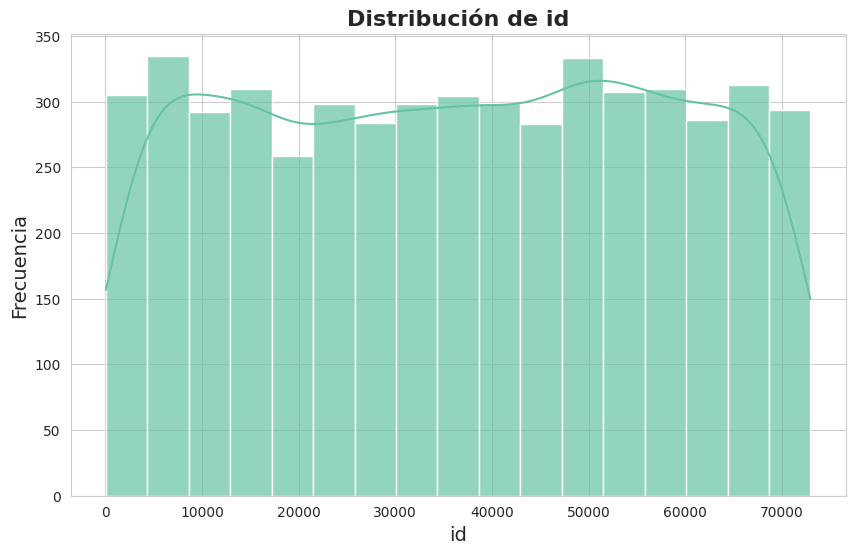

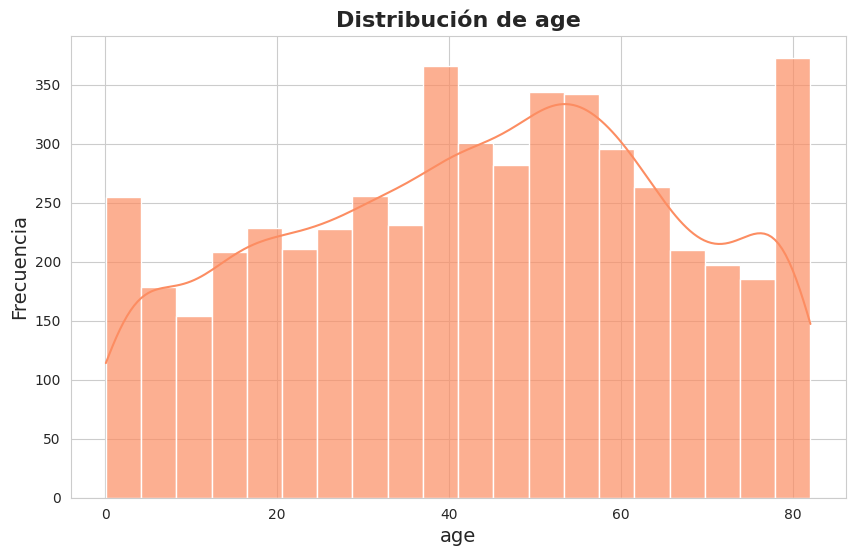

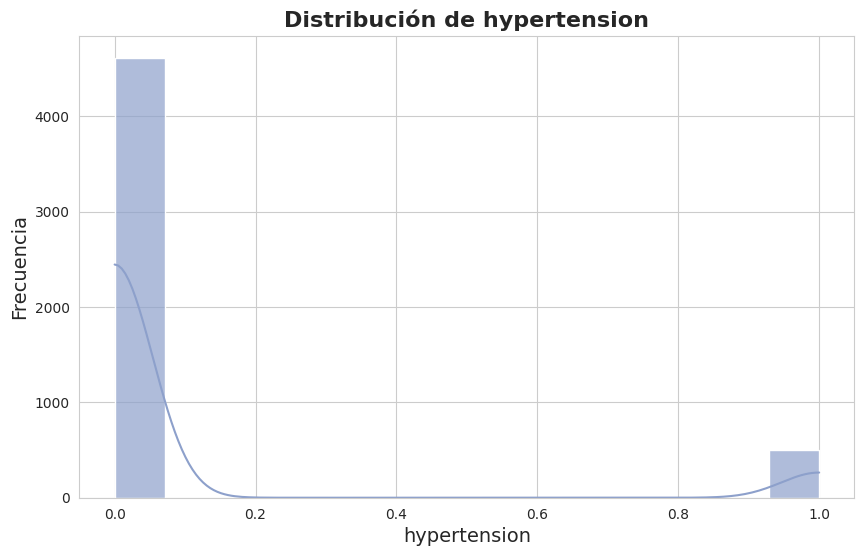

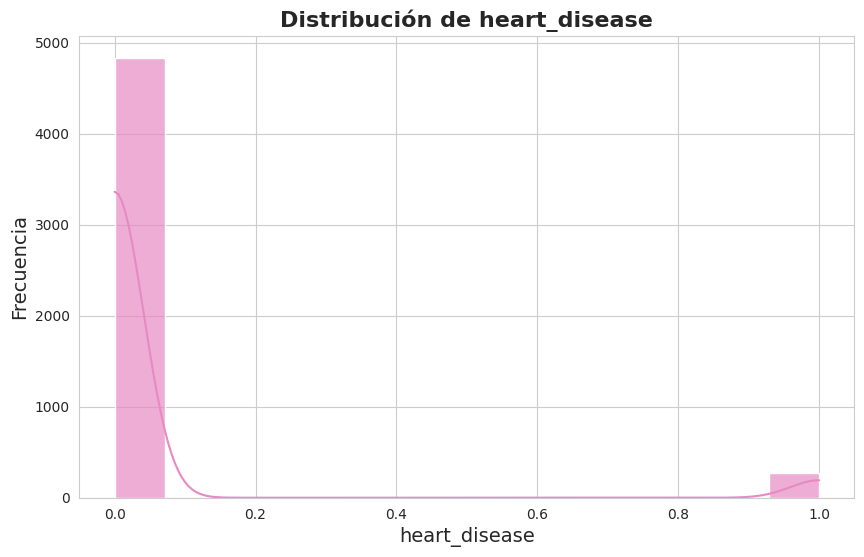

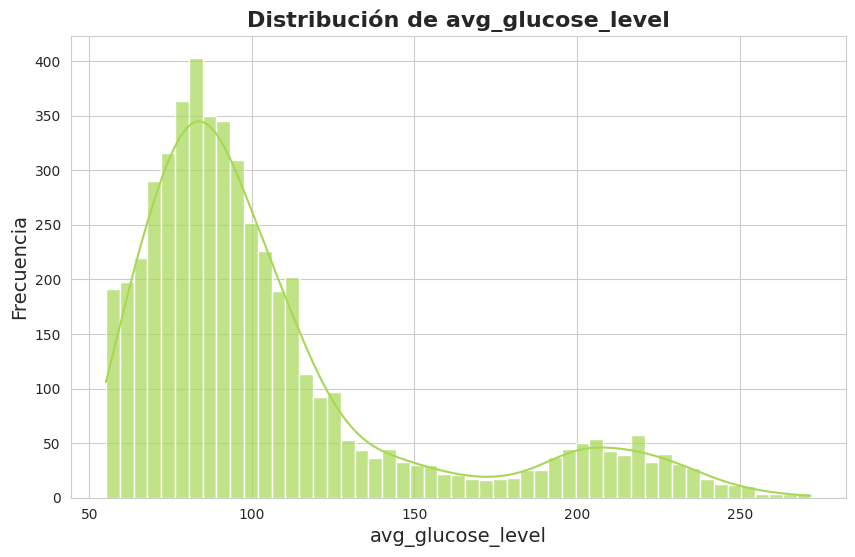

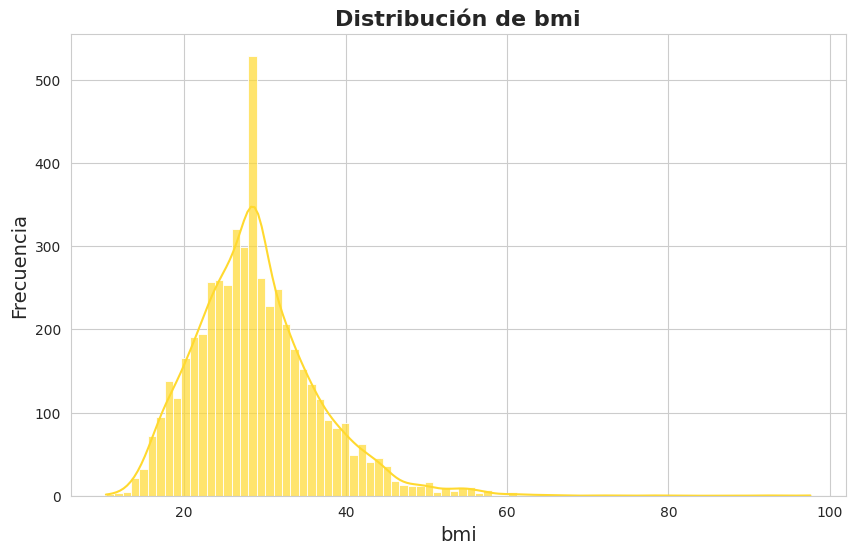

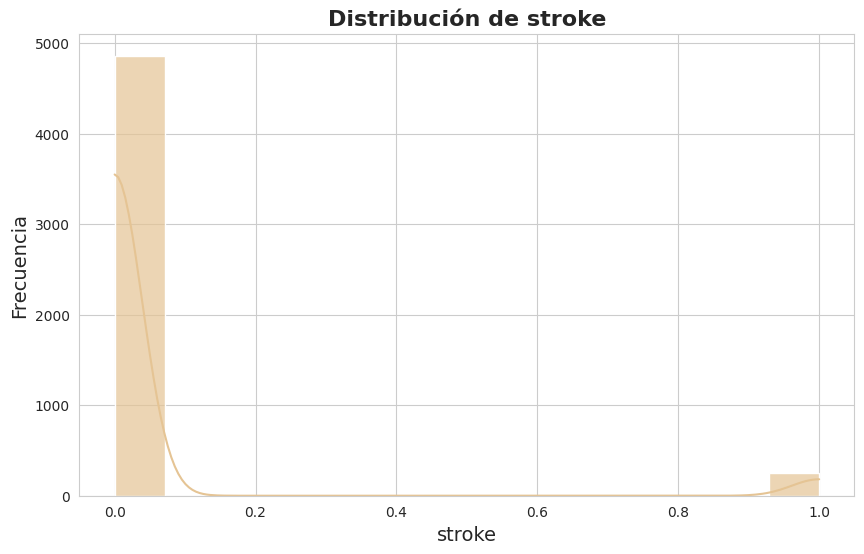

In [12]:
# Visualización de la distribución de los datos

# Establecer un estilo estético
sns.set_style("whitegrid")

# Establecer una paleta de colores para las gráficas
palette = sns.color_palette("Set2", len(df.select_dtypes(include=[np.number]).columns) - (1 if 'Outcome' in df else 0))  # Excluir 'Outcome' si existe

# Filtrar las columnas numéricas y excluir 'Id'
columns_to_plot = [col for col in df.select_dtypes(include=[np.number]).columns if col != 'Outcome']

for i, column in enumerate(columns_to_plot):
    plt.figure(figsize=(10, 6))  # Ajusta el tamaño si lo deseas
    # Usa el color correspondiente a la columna
    sns.histplot(df[column].dropna(), kde=True, color=palette[i], alpha=0.7)

    # Añadir título y etiquetas
    plt.title(f'Distribución de {column}', fontsize=16, fontweight='bold')
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Frecuencia', fontsize=14)

    # Mostrar la gráfica
    plt.show()

In [13]:
# Filtrar las columnas numéricas
numerical_cols = df.select_dtypes(include=[np.number]).columns

# Crear un diccionario para almacenar los outliers
outliers = {}

# Iterar por cada columna numérica para detectar outliers
for col in numerical_cols:
    # Calcular el primer cuartil (Q1), el tercer cuartil (Q3) y el IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Calcular los límites inferior y superior para los outliers
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Detectar los outliers
    outliers_in_col = df[(df[col] < lower_limit) | (df[col] > upper_limit)]

    # Si hay outliers, almacenarlos en el diccionario
    if not outliers_in_col.empty:
        outliers[col] = outliers_in_col

# Imprimir los resultados
if outliers:
    print("Outliers detectados:")
    for col, data in outliers.items():
        print(f"\nColumna: {col}")
        print(data)
else:
    print("No se detectaron outliers en el DataFrame.")

Outliers detectados:

Columna: hypertension
         id  gender   age  hypertension  heart_disease ever_married  \
4      1665  Female 79.00             1              0          Yes   
6     53882    Male 74.00             1              1          Yes   
10    12109  Female 81.00             1              0          Yes   
15    58202  Female 50.00             1              0          Yes   
17    34120    Male 75.00             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5088  22190  Female 64.00             1              0          Yes   
5091   6369    Male 59.00             1              0          Yes   
5093  32235  Female 45.00             1              0          Yes   
5100  68398    Male 82.00             1              0          Yes   
5105  18234  Female 80.00             1              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi smoking_status  \
4     Self-employed      

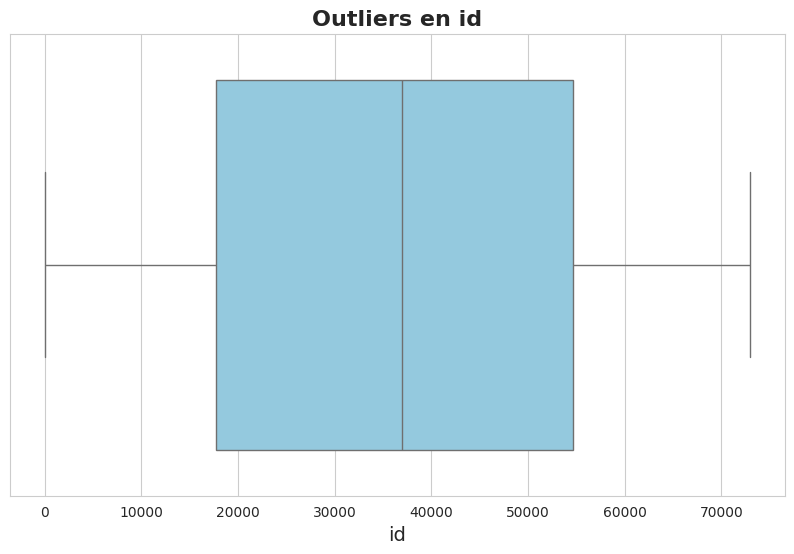

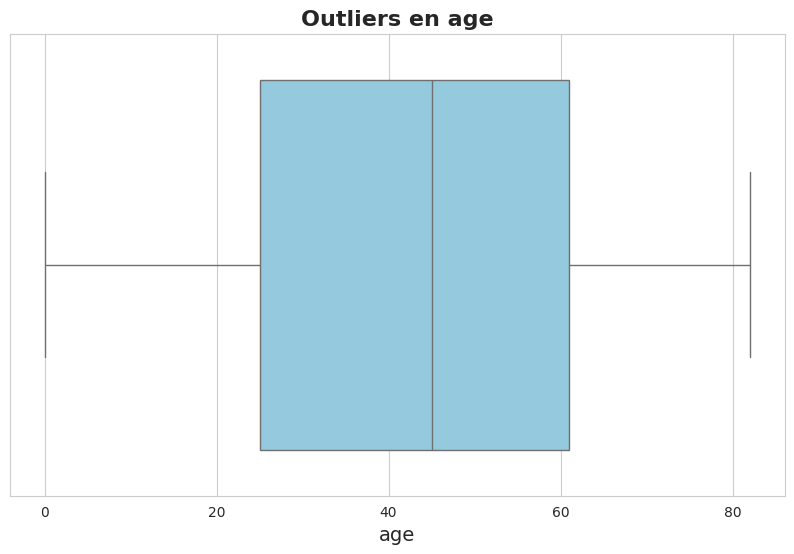

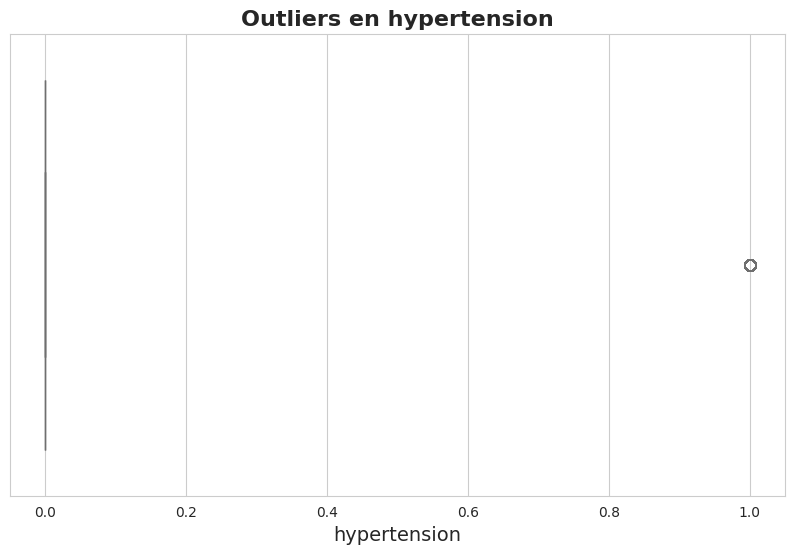

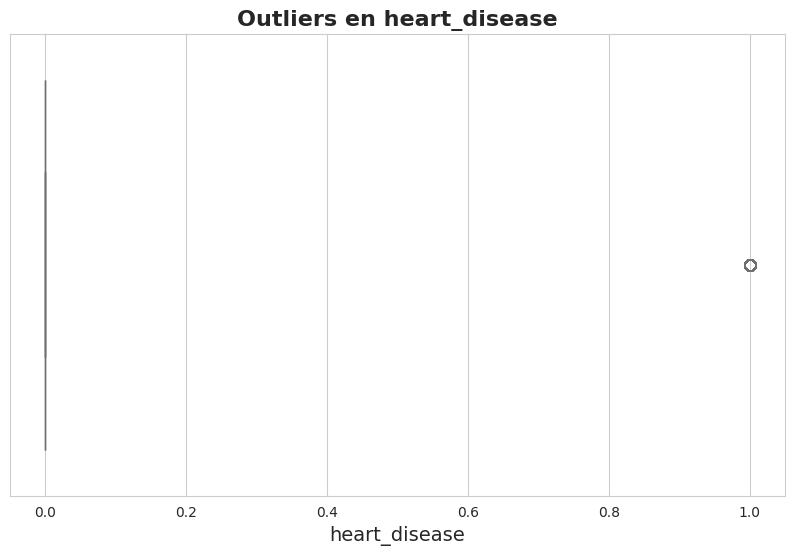

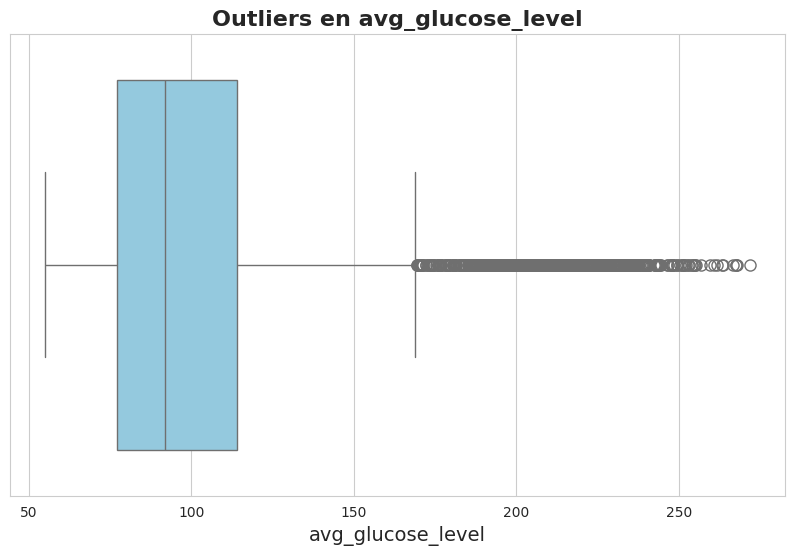

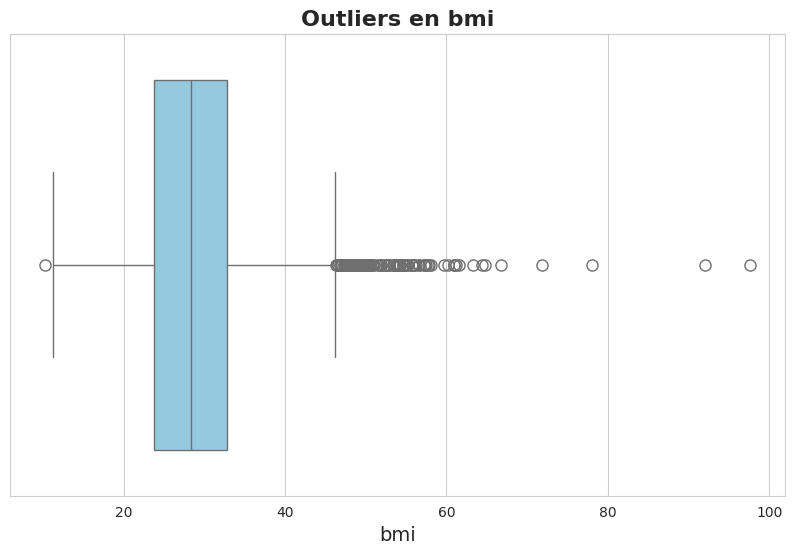

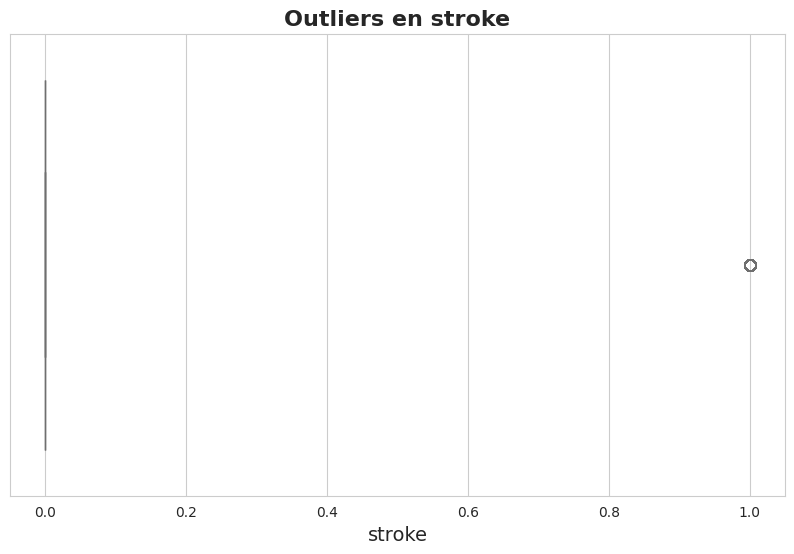

In [14]:
# Identificación de outliers usando boxplot
# Establecer un estilo estético
sns.set_style("whitegrid")

# Establecer una paleta de colores para las gráficas
sns.set_palette("Set2")

# Filtrar las columnas numéricas y excluir 'Id'
columns_to_plot = [col for col in df.select_dtypes(include=[np.number]).columns if col != 'Outcome']

for column in columns_to_plot:
    plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura
    sns.boxplot(x=df[column].dropna(), color='skyblue', fliersize=8)  # Puedes ajustar el color y tamaño de los outliers

    # Añadir título y etiquetas
    plt.title(f'Outliers en {column}', fontsize=16, fontweight='bold')
    plt.xlabel(column, fontsize=14)

    # Mostrar la gráfica
    plt.show()

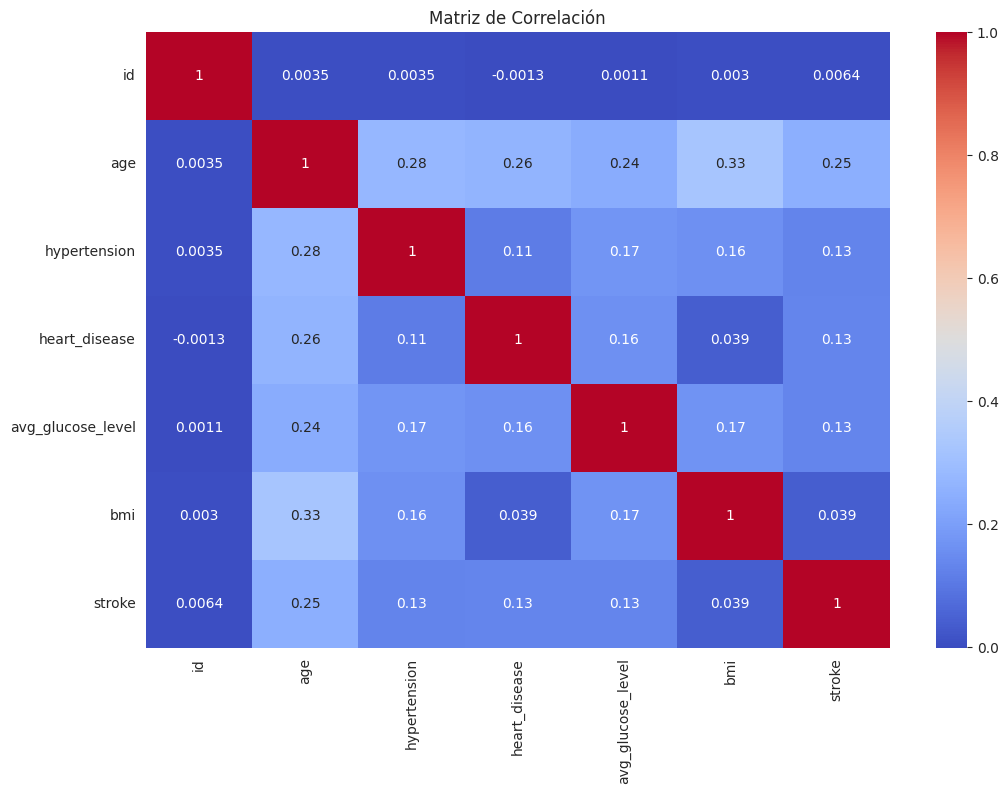

In [20]:
# Matriz de correlación para detectar patrones entre variables numéricas
plt.figure(figsize=(12, 8))
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

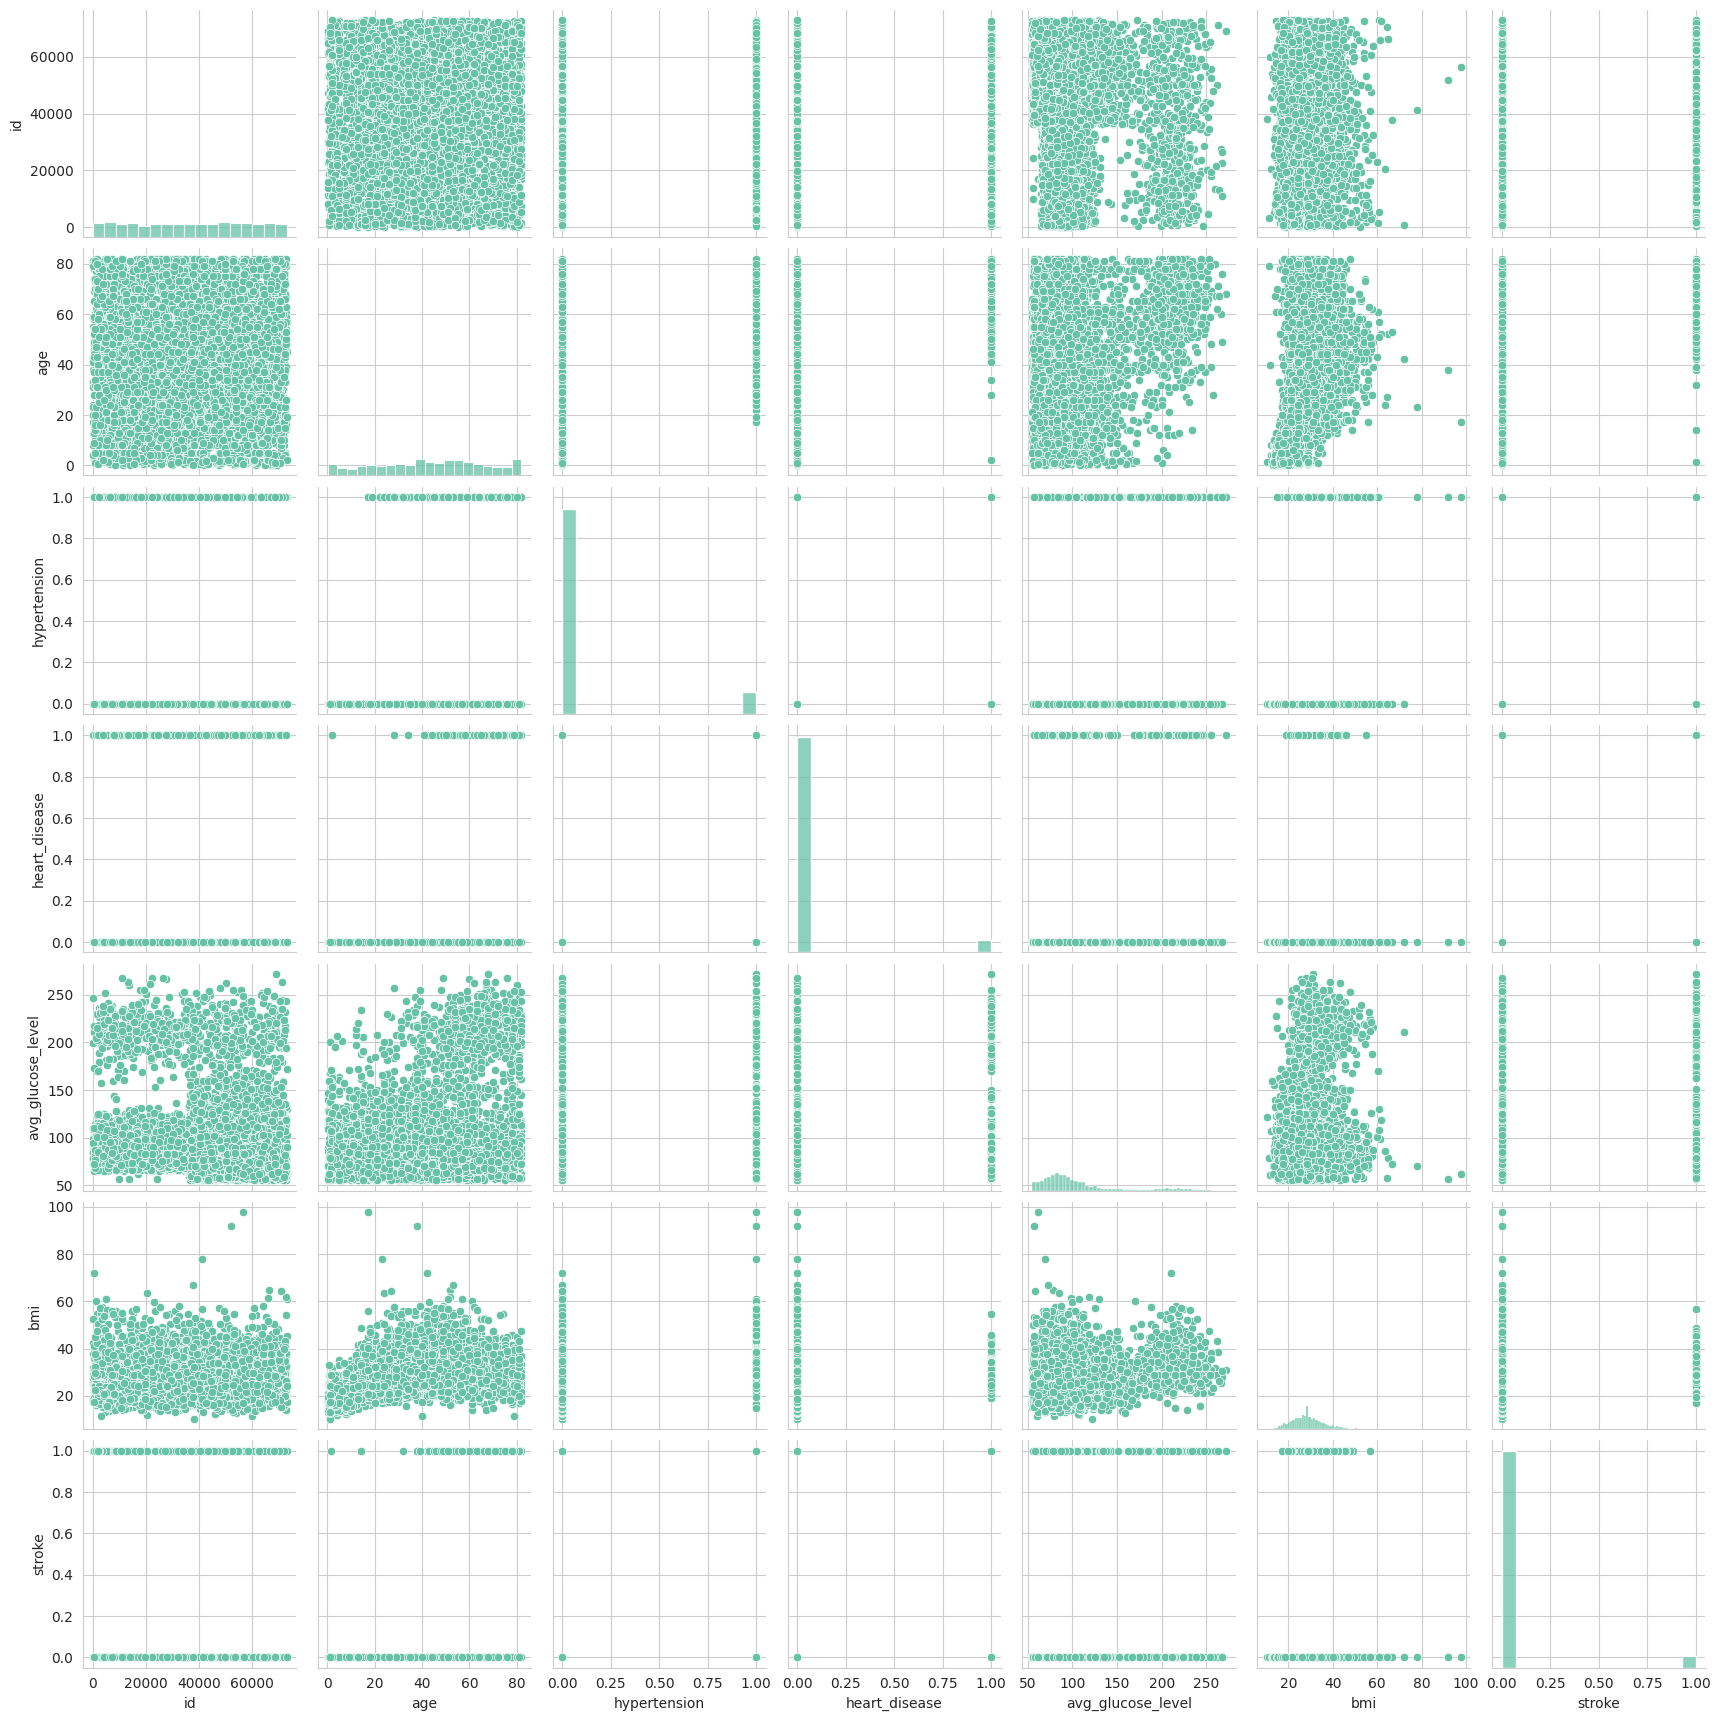

In [21]:
# Análisis de pares de variables para detectar patrones
sns.pairplot(df.dropna())
plt.show()

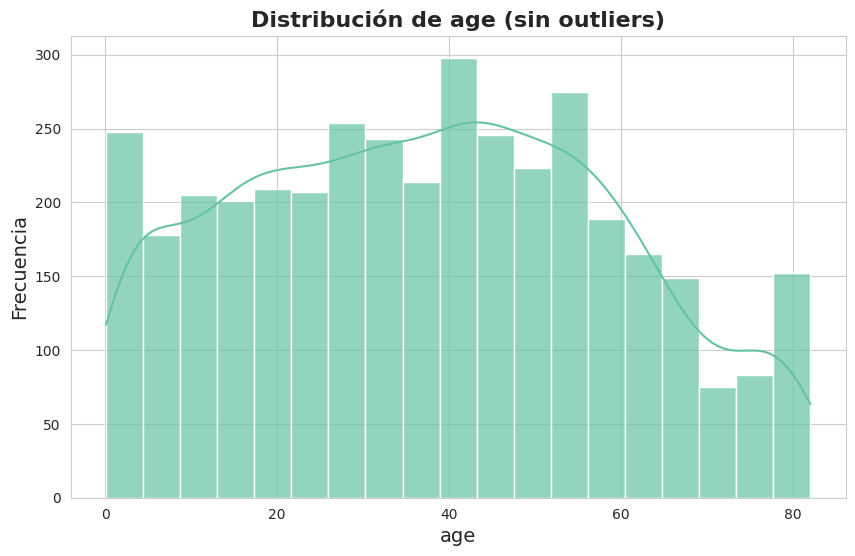

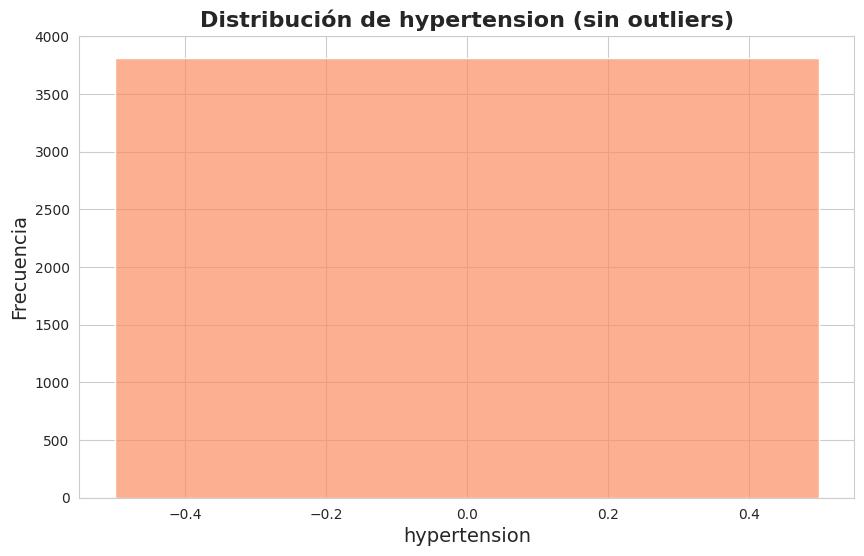

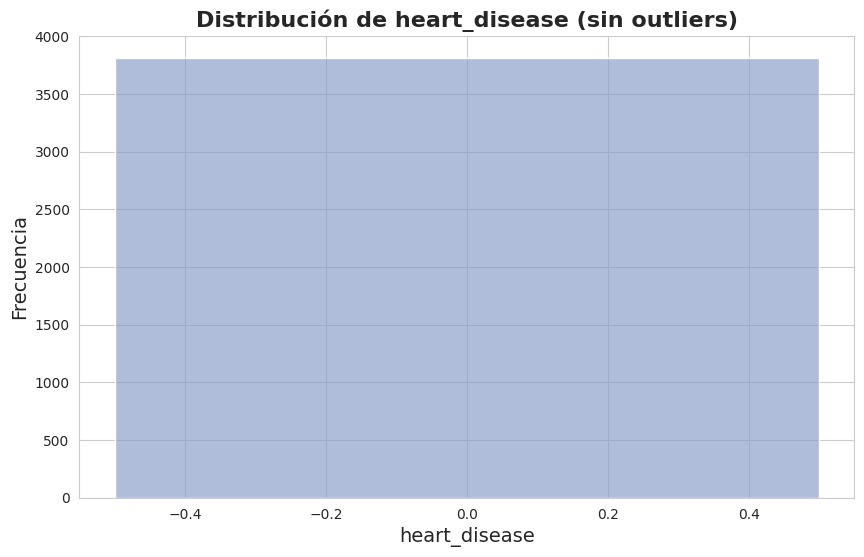

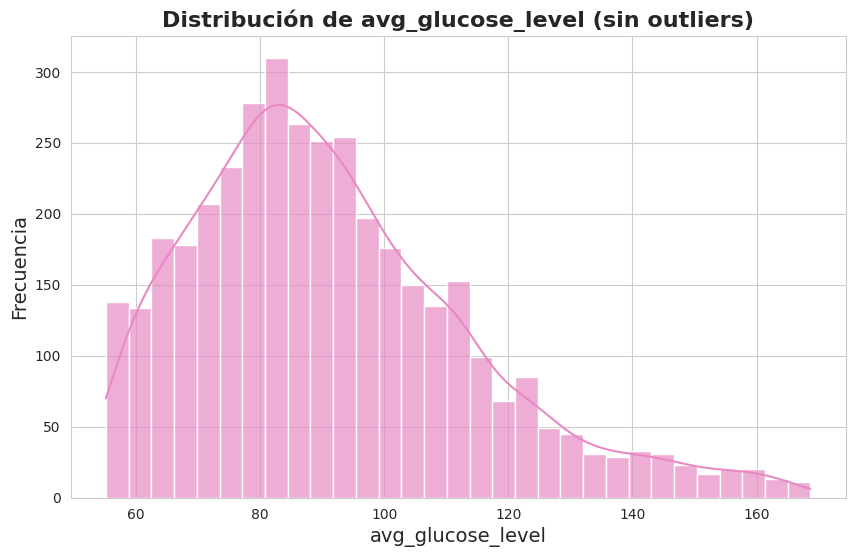

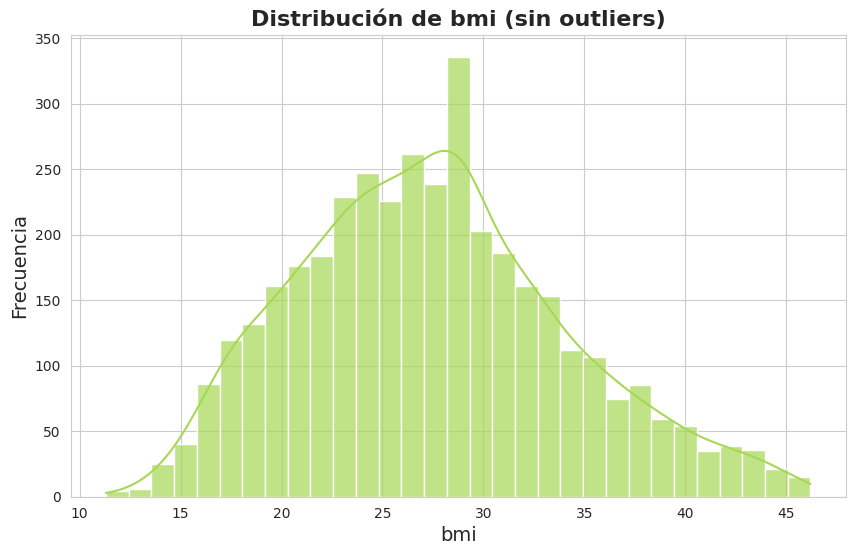

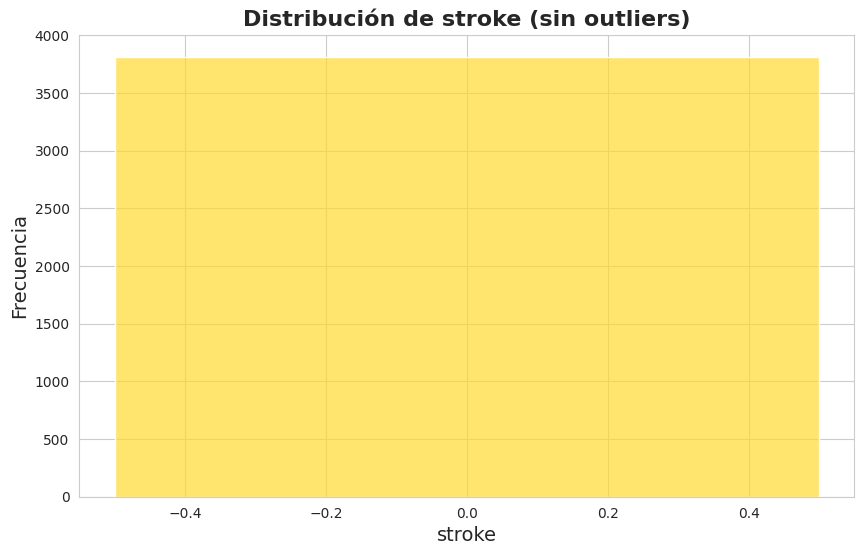

In [22]:
# Establecer un estilo estético
sns.set_style("whitegrid")

# Filtrar las columnas numéricas, excluyendo 'Id'
numerical_cols = [col for col in df.select_dtypes(include=[np.number]).columns if col != 'Outcome']

# Establecer una paleta de colores con tantos colores como columnas
palette = sns.color_palette("Set2", len(numerical_cols))

# Crear un diccionario para almacenar los datos sin outliers
df_no_outliers = df.copy()

# Iterar por cada columna numérica (excluyendo 'Id') para eliminar los outliers
for col in numerical_cols:
    # Calcular el primer cuartil (Q1), el tercer cuartil (Q3) y el IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Calcular los límites inferior y superior para los outliers
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Eliminar los outliers de la columna
    df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower_limit) & (df_no_outliers[col] <= upper_limit)]

# Ahora, generar gráficos sin los outliers y con colores distintos
# Reset i to 0 before starting this loop
i = 0
for column in df_no_outliers.select_dtypes(include=[np.number]).columns:
    if column != 'id':  # Asegúrate de no graficar la columna 'Id'
        plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura
        # Usar un color distinto para cada gráfica
        sns.histplot(df_no_outliers[column].dropna(), kde=True, color=palette[i % len(palette)], alpha=0.7)  # Histograma sin outliers
        # Use the modulo operator (%) to ensure i stays within the range of palette

        # Añadir título y etiquetas
        plt.title(f'Distribución de {column} (sin outliers)', fontsize=16, fontweight='bold')
        plt.xlabel(column, fontsize=14)
        plt.ylabel('Frecuencia', fontsize=14)

        # Mostrar la gráfica
        plt.show()
        # Increment i only if the column is plotted
        i += 1

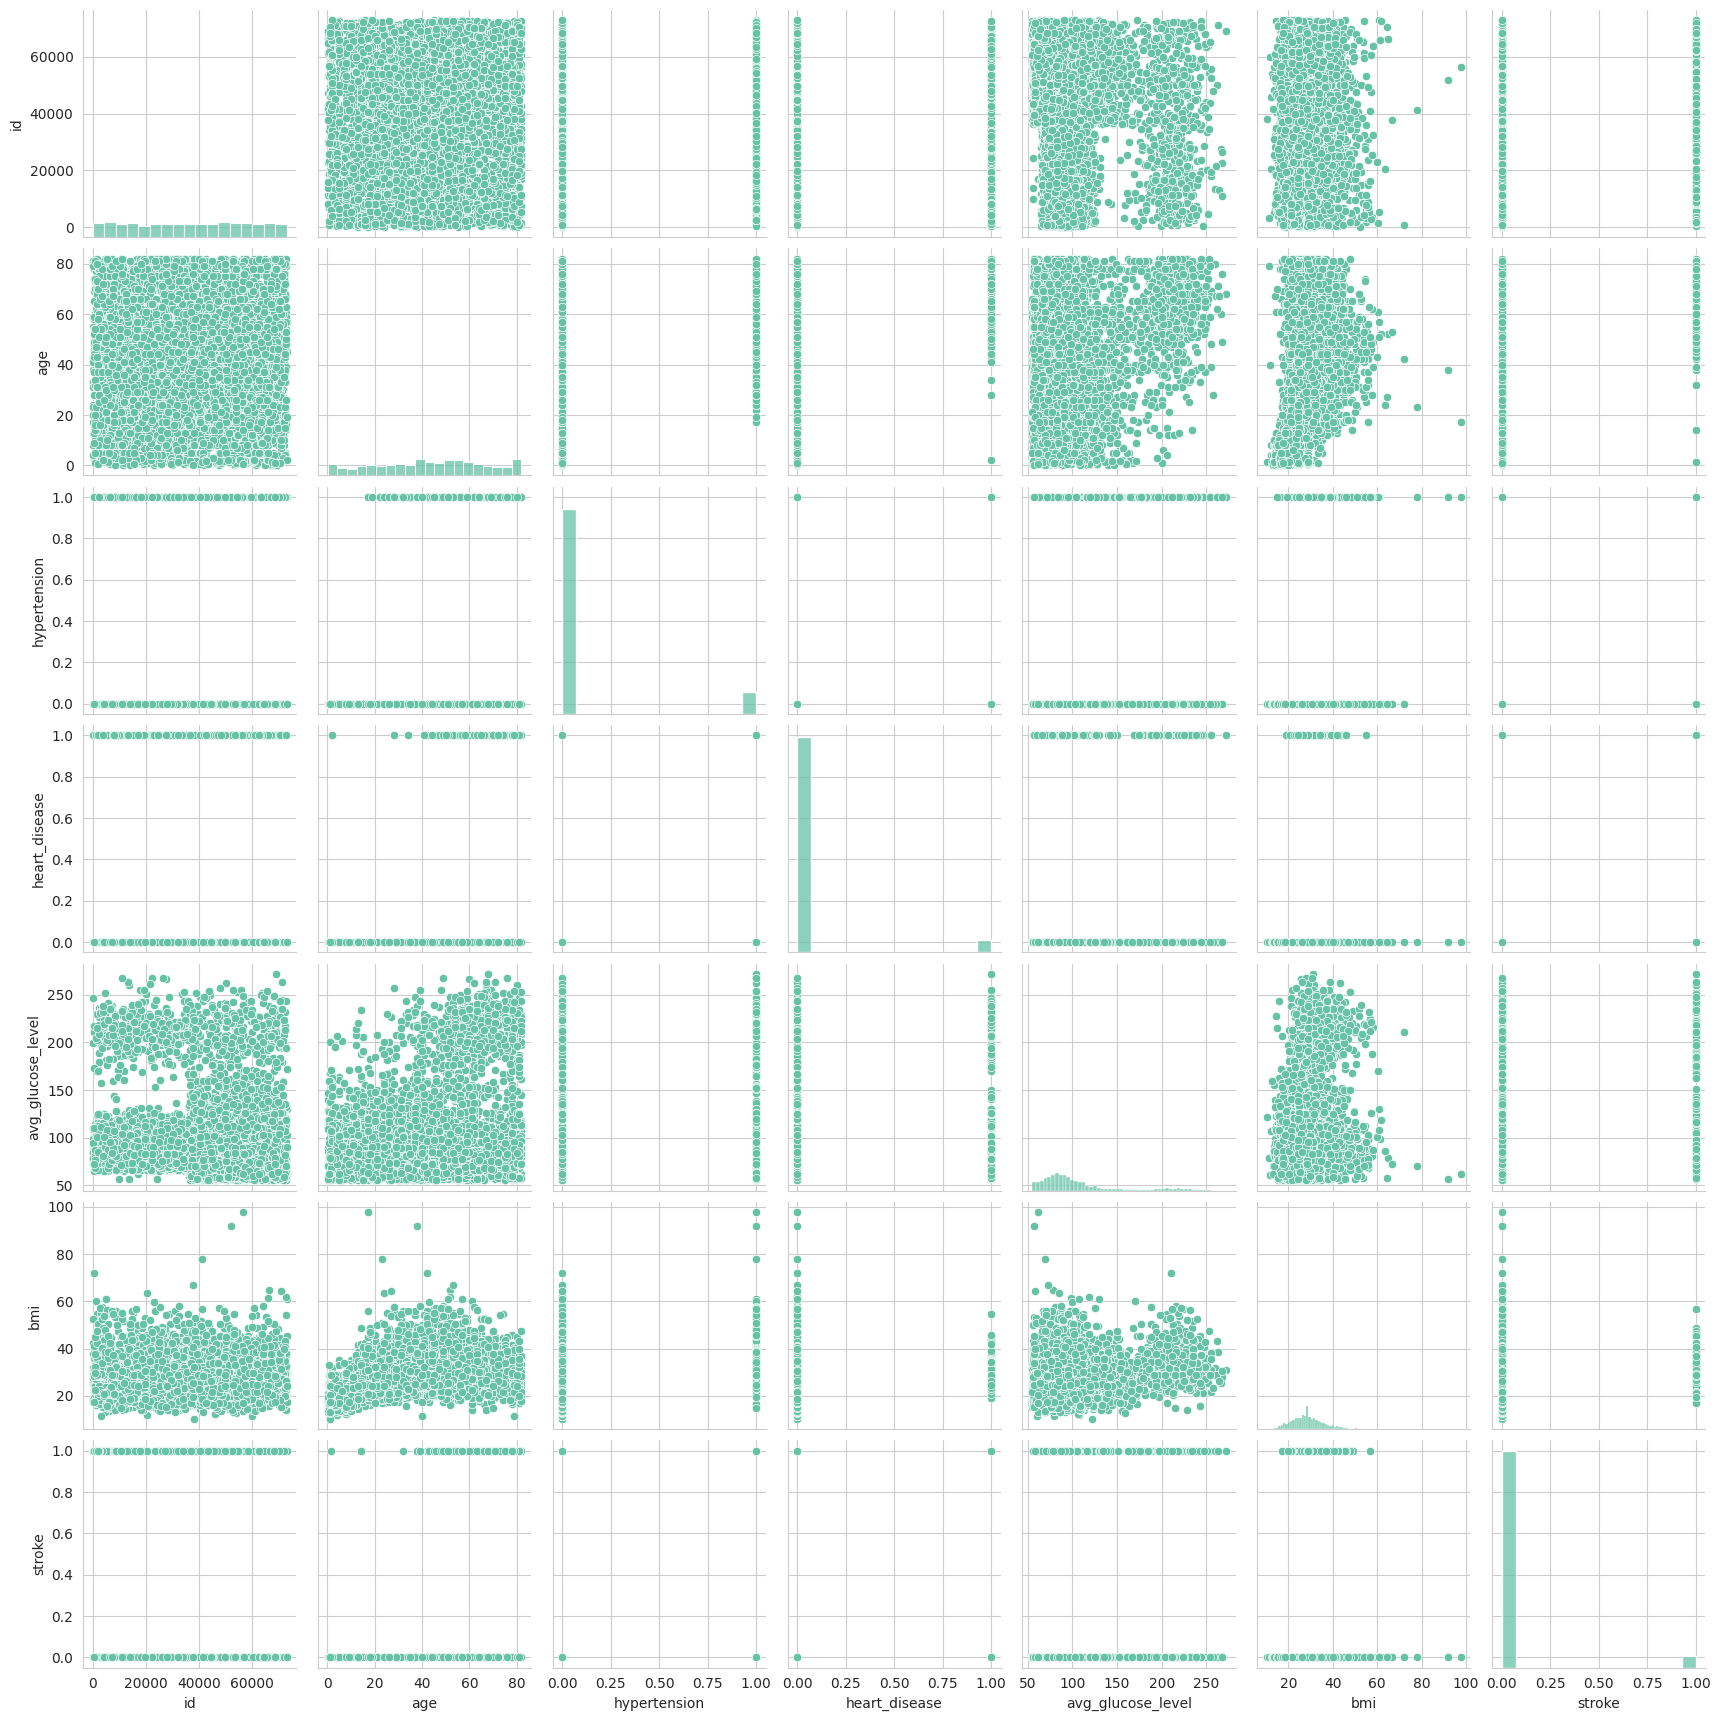

In [23]:
# Análisis de pares de variables para detectar patrones SIN OUTLIERS
sns.pairplot(df.dropna())
plt.show()

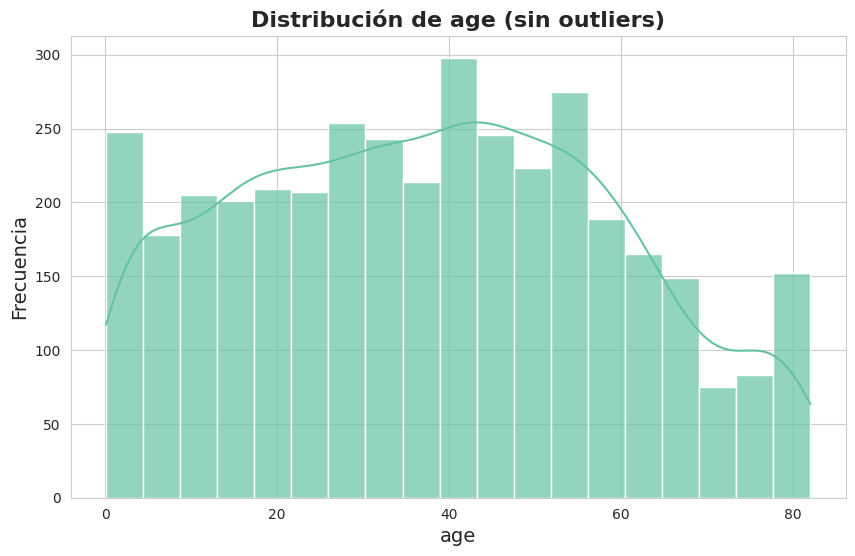

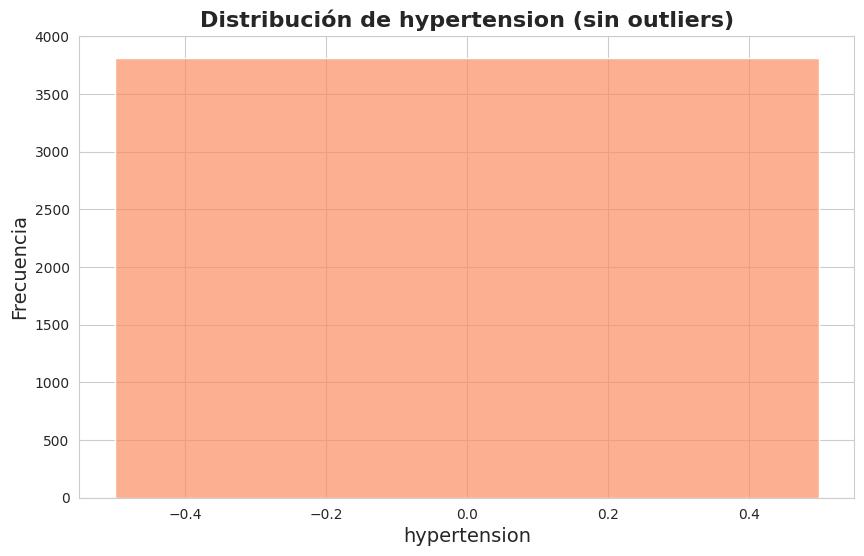

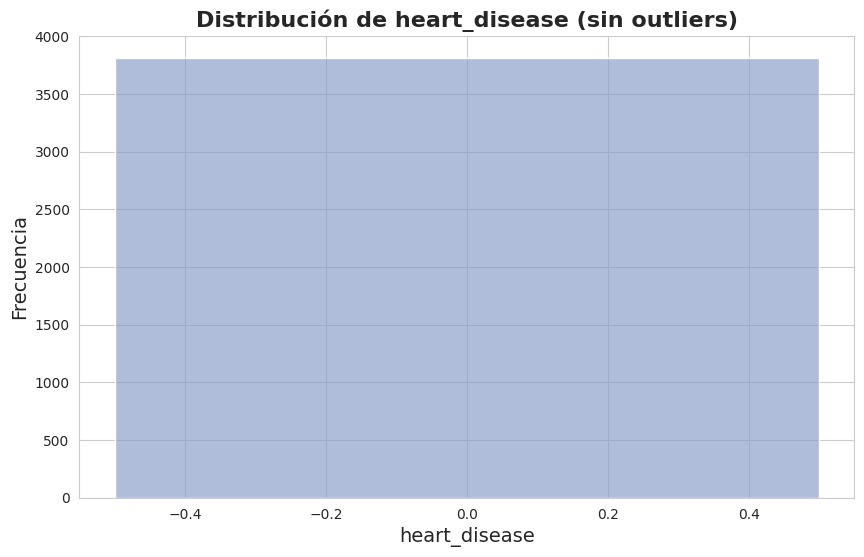

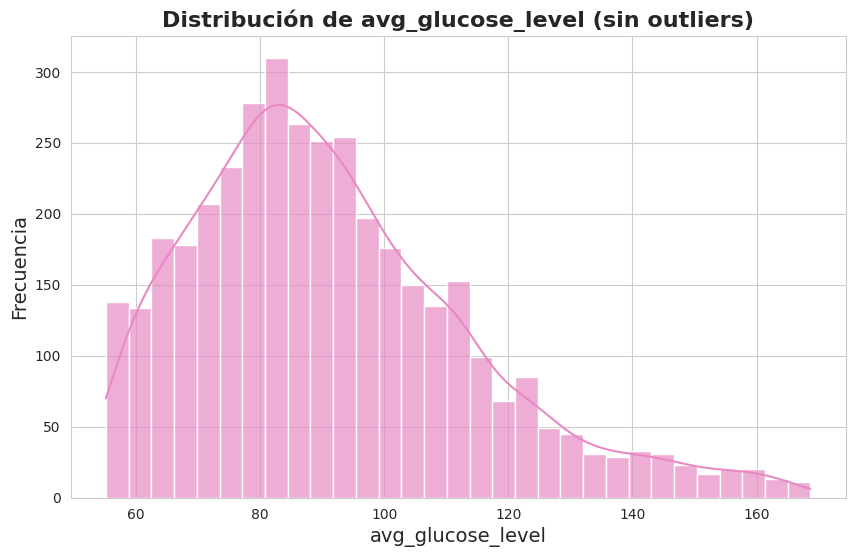

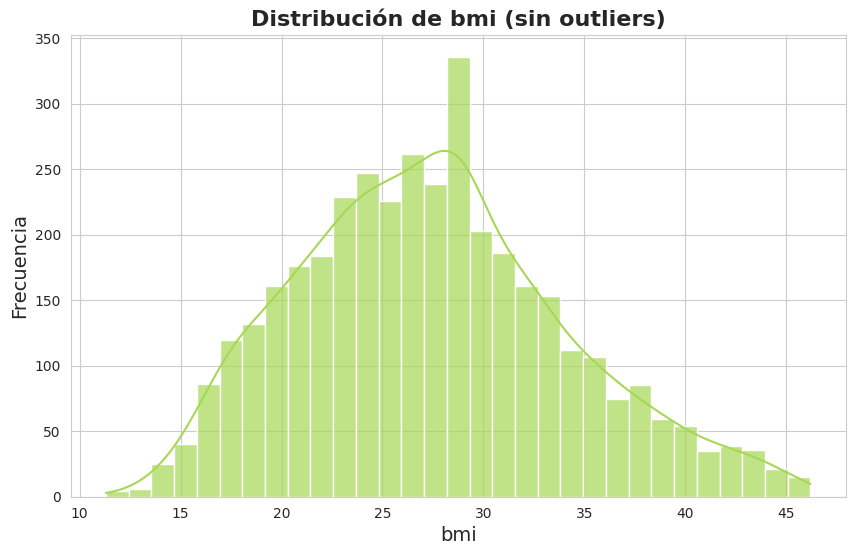

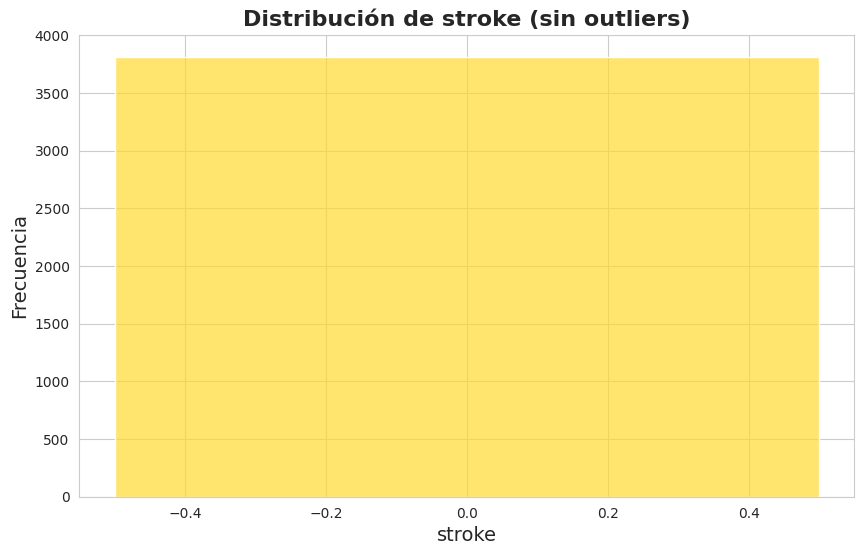

In [24]:
# Establecer un estilo estético
sns.set_style("whitegrid")

# Filtrar las columnas numéricas, excluyendo 'Id'
numerical_cols = [col for col in df.select_dtypes(include=[np.number]).columns if col != 'Outcome']

# Establecer una paleta de colores con tantos colores como columnas
palette = sns.color_palette("Set2", len(numerical_cols))

# Crear un diccionario para almacenar los datos sin outliers
df_no_outliers = df.copy()

# Iterar por cada columna numérica (excluyendo 'Id') para eliminar los outliers
for col in numerical_cols:
    # Calcular el primer cuartil (Q1), el tercer cuartil (Q3) y el IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Calcular los límites inferior y superior para los outliers
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Eliminar los outliers de la columna
    df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower_limit) & (df_no_outliers[col] <= upper_limit)]

# Ahora, generar gráficos sin los outliers y con colores distintos
# Reset i to 0 before starting this loop
i = 0
for column in df_no_outliers.select_dtypes(include=[np.number]).columns:
    if column != 'id':  # Asegúrate de no graficar la columna 'Id'
        plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura
        # Usar un color distinto para cada gráfica
        sns.histplot(df_no_outliers[column].dropna(), kde=True, color=palette[i % len(palette)], alpha=0.7)  # Histograma sin outliers
        # Use the modulo operator (%) to ensure i stays within the range of palette

        # Añadir título y etiquetas
        plt.title(f'Distribución de {column} (sin outliers)', fontsize=16, fontweight='bold')
        plt.xlabel(column, fontsize=14)
        plt.ylabel('Frecuencia', fontsize=14)

        # Mostrar la gráfica
        plt.show()
        # Increment i only if the column is plotted
        i += 1

In [25]:
#TABLAS DE FRECUENCIAS

# Filtrar las columnas categóricas
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Crear una tabla de frecuencias para las columnas categóricas
for col in categorical_cols:
    print(f"\nTabla de frecuencias para la columna: {col}")

    # Generar la tabla de frecuencias
    freq_table = df[col].value_counts().reset_index()
    freq_table.columns = [col, 'Frecuencia']  # Renombrar las columnas
    freq_table['Frecuencia acumulada'] = freq_table['Frecuencia'].cumsum()  # Calcular frecuencia acumulada
    freq_table['Frecuencia relativa (%)'] = (freq_table['Frecuencia'] / freq_table['Frecuencia'].sum()) * 100  # Añadir columna de porcentaje
    freq_table['Frecuencia acumulada (%)'] = (freq_table['Frecuencia acumulada'] / freq_table['Frecuencia'].sum()) * 100  # Frecuencia acumulada en porcentaje

    # Mostrar la tabla
    print(freq_table)

# Para las columnas numéricas, agrupadas en rangos:
numerical_cols = df.select_dtypes(include=[np.number]).columns

for col in numerical_cols:
    print(f"\nTabla de frecuencias para la columna numérica: {col}")

    # Agrupar las columnas numéricas en rangos, por ejemplo, de 10 unidades
    bins = pd.cut(df[col], bins=10)  # Puedes ajustar el número de bins
    freq_table_num = bins.value_counts().reset_index()
    freq_table_num.columns = ['Rango', 'Frecuencia']  # Renombrar las columnas
    freq_table_num['Frecuencia acumulada'] = freq_table_num['Frecuencia'].cumsum()  # Calcular frecuencia acumulada
    freq_table_num['Frecuencia relativa (%)'] = (freq_table_num['Frecuencia'] / freq_table_num['Frecuencia'].sum()) * 100  # Frecuencia relativa
    freq_table_num['Frecuencia acumulada (%)'] = (freq_table_num['Frecuencia acumulada'] / freq_table_num['Frecuencia'].sum()) * 100  # Frecuencia acumulada en porcentaje

    # Mostrar la tabla
    print(freq_table_num)


Tabla de frecuencias para la columna: gender
   gender  Frecuencia  Frecuencia acumulada  Frecuencia relativa (%)  \
0  Female        2994                  2994                    58.59   
1    Male        2115                  5109                    41.39   
2   Other           1                  5110                     0.02   

   Frecuencia acumulada (%)  
0                     58.59  
1                     99.98  
2                    100.00  

Tabla de frecuencias para la columna: ever_married
  ever_married  Frecuencia  Frecuencia acumulada  Frecuencia relativa (%)  \
0          Yes        3353                  3353                    65.62   
1           No        1757                  5110                    34.38   

   Frecuencia acumulada (%)  
0                     65.62  
1                    100.00  

Tabla de frecuencias para la columna: work_type
       work_type  Frecuencia  Frecuencia acumulada  Frecuencia relativa (%)  \
0        Private        2925               

In [26]:
# RESUMEN DE MEDIDAS

# Filtrar las columnas numéricas
numerical_cols = df.select_dtypes(include=[np.number]).columns

# Calcular las medidas de resumen para cada columna numérica
for col in numerical_cols:
    print(f"\nMedidas de resumen para la columna: {col}")

    # Media
    media = df[col].mean()

    # Moda
    moda = df[col].mode()[0]  # Se usa el primer valor de la moda (si hay varias modas)

    # Primer cuartil (Q1)
    Q1 = df[col].quantile(0.25)

    # Segundo cuartil (Q2), que es la mediana
    Q2 = df[col].median()

    # Mostrar las medidas
    print(f"Media: {media}")
    print(f"Moda: {moda}")
    print(f"Q1 (Primer cuartil): {Q1}")
    print(f"Q2 (Mediana): {Q2}")


Medidas de resumen para la columna: id
Media: 36517.82935420744
Moda: 67
Q1 (Primer cuartil): 17741.25
Q2 (Mediana): 36932.0

Medidas de resumen para la columna: age
Media: 43.226614481409
Moda: 78.0
Q1 (Primer cuartil): 25.0
Q2 (Mediana): 45.0

Medidas de resumen para la columna: hypertension
Media: 0.0974559686888454
Moda: 0
Q1 (Primer cuartil): 0.0
Q2 (Mediana): 0.0

Medidas de resumen para la columna: heart_disease
Media: 0.05401174168297456
Moda: 0
Q1 (Primer cuartil): 0.0
Q2 (Mediana): 0.0

Medidas de resumen para la columna: avg_glucose_level
Media: 106.1476771037182
Moda: 93.88
Q1 (Primer cuartil): 77.245
Q2 (Mediana): 91.88499999999999

Medidas de resumen para la columna: bmi
Media: 28.893236911794663
Moda: 28.893236911794666
Q1 (Primer cuartil): 23.8
Q2 (Mediana): 28.4

Medidas de resumen para la columna: stroke
Media: 0.0487279843444227
Moda: 0.0
Q1 (Primer cuartil): 0.0
Q2 (Mediana): 0.0


## REGRESIÓN LOGISTICA

In [27]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Dimesión del dataframe
df.shape
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male 67.00             0              1          Yes   
1  51676  Female 61.00             0              0          Yes   
2  31112    Male 80.00             0              1          Yes   
3  60182  Female 49.00             0              0          Yes   
4   1665  Female 79.00             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69 36.60  formerly smoked   
1  Self-employed          Rural             202.21 28.89     never smoked   
2        Private          Rural             105.92 32.50     never smoked   
3        Private          Urban             171.23 34.40           smokes   
4  Self-employed          Rural             174.12 24.00     never smoked   

   stroke  
0    1.00  
1    1.00  
2    1.00  
3    1.00  
4    1.00

In [28]:
X  = df[['age','hypertension','heart_disease']]#df[['age','hypertension','heart_disease','avg_glucose_level','bmi']]
y = df['stroke']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=42)

In [139]:
X_test.head(2)

age  hypertension  heart_disease
4688 31.00             0              0
4478 40.00             0              0

In [29]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_train_resh, y_train_resh = oversample.fit_resample(X_train, y_train.ravel())

<ipython-input-29-68df0ab1e706>:5: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  X_train_resh, y_train_resh = oversample.fit_resample(X_train, y_train.ravel())


In [30]:
import statsmodels.api as sm

import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 stroke   No. Observations:                 1533
Model:                            GLM   Df Residuals:                     1529
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -243.77
Date:                Wed, 26 Feb 2025   Deviance:                       487.53
Time:                        01:24:09   Pearson chi2:                 1.06e+03
No. Iterations:                     8   Pseudo R-squ. (CS):            0.07365
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -6.9745      0.587    -11.883      0.000      -8.125      -5.824
age               0.0700      0.009      7.847      0.000       0.053       0.088
hypertension      0.1958      0.306      0.641      0.522      -0.403       0.795
heart_disease     0.4903      0.329      1.489      0.136      -0.155       1.135
=================================================================================
"""

In [31]:
y_train_pred = res.predict(X_train_sm)

# Una mirada a las primeras 20 predicciones:
y_train_pred.head(20)

2257   0.12
3729   0.02
473    0.02
21     0.04
2752   0.01
885    0.01
2448   0.00
917    0.05
3946   0.00
3940   0.00
2239   0.02
4036   0.06
3395   0.01
1265   0.00
483    0.00
4435   0.00
2963   0.03
1219   0.01
277    0.04
988    0.00
dtype: float64

In [32]:
# Creando una tabla de resultados de la ejecución del modelo en la muestra de entrenamiento:

data = {'age': X_train['age'], 'hypertension': X_train['hypertension'], 'heart_disease': X_train['heart_disease'],  'stroke': y_train, 'y_train_pred': y_train_pred}
dib_train = pd.DataFrame(data)


In [33]:
dib_train.head()

age  hypertension  heart_disease  stroke  y_train_pred
2257 71.00             0              0    0.00          0.12
3729 45.00             0              0    0.00          0.02
473  43.00             0              0    0.00          0.02
21   52.00             1              0    1.00          0.04
2752 38.00             0              0    0.00          0.01

In [34]:
# A partir de las propensiones, creamos una variable de clasificación (Diabetes: 0, 1), con punto de corte en 50%:

dib_train['ACV_predicted'] = dib_train.y_train_pred.map(lambda x: 1 if x > 0.5 else 0)

# Una mirada rápida a la nueva base:
dib_train.head()

age  hypertension  heart_disease  stroke  y_train_pred  ACV_predicted
2257 71.00             0              0    0.00          0.12              0
3729 45.00             0              0    0.00          0.02              0
473  43.00             0              0    0.00          0.02              0
21   52.00             1              0    1.00          0.04              0
2752 38.00             0              0    0.00          0.01              0

In [35]:
from sklearn import metrics

# Matriz de Confusión:
confusion = metrics.confusion_matrix(dib_train.stroke, dib_train.ACV_predicted) # Using the correct column names for actual and predicted values
print(confusion)

[[1457    0]
 [  76    0]]


Text(0.5, 427.9555555555555, 'Niveles Predecidos')

<Figure size 500x200 with 0 Axes>

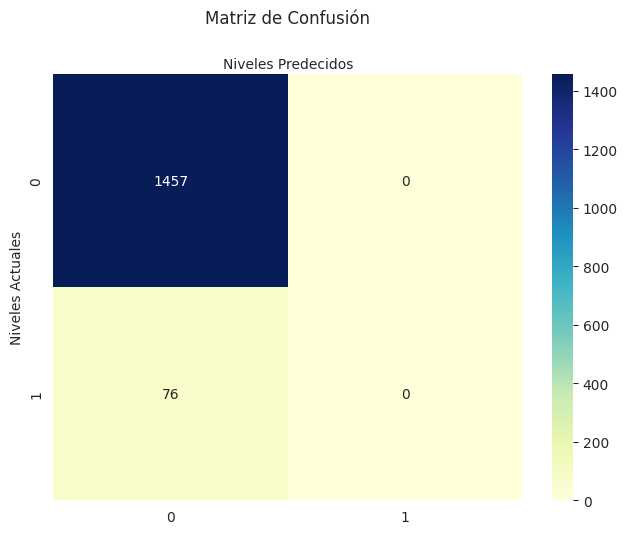

In [36]:
# Visualizando la matriz de confusión usando Heatmap:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics


cnf_matrix = metrics.confusion_matrix(dib_train.stroke, dib_train.ACV_predicted)
# cnf_matrix



# import required modules
plt.figure(figsize=(5,2))
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de Confusión', y=1.1)
plt.ylabel('Niveles Actuales')
plt.xlabel('Niveles Predecidos')

In [38]:
# Comprobamos el Accuracy, que es la Precisión General del Modelo:

print(round(metrics.accuracy_score(dib_train.stroke, dib_train.ACV_predicted), 3))

0.95


In [39]:
# Creamos columnas con diferentes límites de Cut-Off:

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    dib_train[i]= dib_train.y_train_pred.map(lambda x: 1 if x > i else 0)
dib_train.head()

age   hypertension   heart_disease   stroke   y_train_pred  \
2257 71.00              0               0     0.00           0.12   
3729 45.00              0               0     0.00           0.02   
473  43.00              0               0     0.00           0.02   
21   52.00              1               0     1.00           0.04   
2752 38.00              0               0     0.00           0.01   

       ACV_predicted  0.00  0.10  0.20  0.30  0.40  0.50  0.60  0.70  0.80  \
2257               0     1     1     0     0     0     0     0     0     0   
3729               0     1     0     0     0     0     0     0     0     0   
473                0     1     0     0     0     0     0     0     0     0   
21                 0     1     0     0     0     0     0     0     0     0   
2752               0     1     0     0     0     0     0     0     0     0   

      0.90  
2257     0  
3729     0  
473      0  
21       0  
2752     0

In [40]:
# Ahora calculemos la sensibilidad y especificidad de la precisión para varios límites de Cut-Off:

cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    # Change 'dib_train.Diabetes' to 'dib_train.stroke' which is your target variable column
    cm1 = metrics.confusion_matrix(dib_train.stroke, dib_train[i])
    total1=sum(sum(cm1))
    Accuracy = (cm1[0,0]+cm1[1,1])/total1

    Specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    Sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,Accuracy,Sensitivity,Specificity]
print(cutoff_df)

      Probability  Accuracy  Sensitivity  Specificity
0.00         0.00      0.05         1.00         0.00
0.10         0.10      0.83         0.58         0.85
0.20         0.20      0.92         0.21         0.95
0.30         0.30      0.95         0.03         0.99
0.40         0.40      0.95         0.00         1.00
0.50         0.50      0.95         0.00         1.00
0.60         0.60      0.95         0.00         1.00
0.70         0.70      0.95         0.00         1.00
0.80         0.80      0.95         0.00         1.00
0.90         0.90      0.95         0.00         1.00


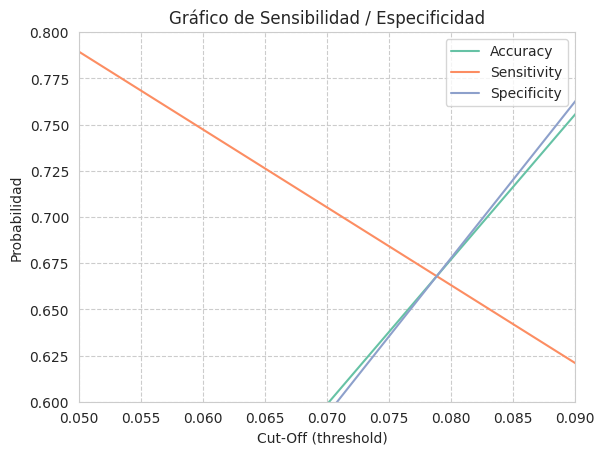

In [41]:
# Graficamos la precisión, la sensibilidad y la especificidad para varias probabilidades.

Grilla_X = np.linspace(0,1,20,endpoint=False)

import matplotlib.pyplot as plt
#cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity']).grid( which='major', color='r' , linestyle='--')
cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity']).grid( which='major', linestyle='--')

plt.title('Gráfico de Sensibilidad / Especificidad')
plt.xlabel('Cut-Off (threshold)  ')
plt.ylabel('Probabilidad')

plt.ylim([0.6, 0.8])
plt.xlim([0.05, 0.09])


plt.show()

In [42]:
dib_train['Diabetes_predicted'] = dib_train.y_train_pred.map(lambda x: 1 if x > 0.078 else 0)

# Una mirada a la base:
dib_train.head(10)

age   hypertension   heart_disease   stroke   y_train_pred  \
2257 71.00              0               0     0.00           0.12   
3729 45.00              0               0     0.00           0.02   
473  43.00              0               0     0.00           0.02   
21   52.00              1               0     1.00           0.04   
2752 38.00              0               0     0.00           0.01   
885  37.00              0               0     0.00           0.01   
2448 24.00              0               0     0.00           0.00   
917  57.00              0               0     0.00           0.05   
3946 11.00              0               0     0.00           0.00   
3940  8.00              0               0     0.00           0.00   

       ACV_predicted  0.00  0.10  0.20  0.30  0.40  0.50  0.60  0.70  0.80  \
2257               0     1     1     0     0     0     0     0     0     0   
3729               0     1     0     0     0     0     0     0     0     0   
473                0     1     0     0     0     0     0     0     0     0   
21                 0     1     0     0     0     0     0     0     0     0   
2752               0     1     0     0     0     0     0     0     0     0   
885                0     1     0     0     0     0     0     0     0     0   
2448               0     1     0     0     0     0     0     0     0     0   
917                0     1     0     0     0     0     0     0     0     0   
3946               0     1     0     0     0     0     0     0     0     0   
3940               0     1     0     0     0     0     0     0     0     0   

      0.90   Diabetes_predicted  
2257     0                    1  
3729     0                    0  
473      0                    0  
21       0                    0  
2752     0                    0  
885      0                    0  
2448     0                    0  
917      0                    0  
3946     0                    0  
3940     0                    0

In [43]:
# Comprobemos el Accuracy general:

print(round(metrics.accuracy_score(dib_train.stroke, dib_train.Diabetes_predicted), 3))

0.81


In [44]:
# Matriz de confusión - Nueva
confusion_train = metrics.confusion_matrix(dib_train.stroke, dib_train.Diabetes_predicted)
print(confusion_train)

[[1188  269]
 [  22   54]]


Text(0.5, 427.9555555555555, 'Niveles Predecidos')

<Figure size 500x200 with 0 Axes>

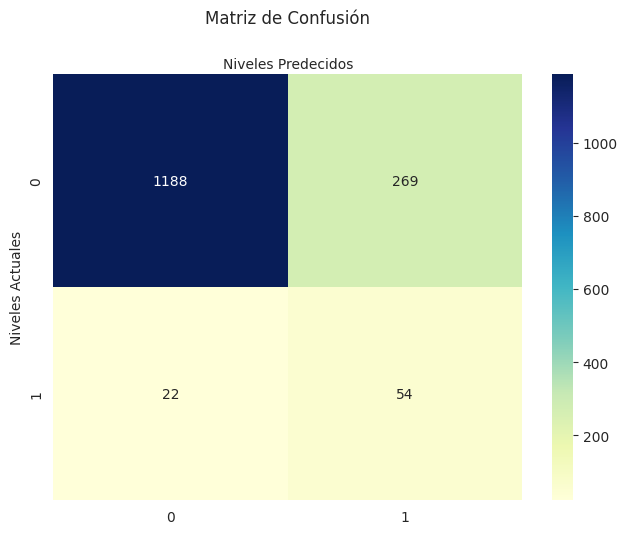

In [45]:
# Visualizando la matriz de confusión usando Heatmap:

from sklearn import metrics

cnf_matrix = confusion_train
# cnf_matrix


# import required modules
plt.figure(figsize=(5,2))
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de Confusión', y=1.1)
plt.ylabel('Niveles Actuales')
plt.xlabel('Niveles Predecidos')

In [46]:
TP = confusion_train[1,1] # true positive
TN = confusion_train[0,0] # true negatives
FP = confusion_train[0,1] # false positives
FN = confusion_train[1,0] # false negatives

In [47]:
# Veamos la sensibilidad de nuestro modelo de regresión logística:

round(TP / float(TP+FN), 3)

0.711

****************************************************
Ahora construímos el Dataframe de Validación (Test):
****************************************************

In [48]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)
dib_test = pd.DataFrame()
dib_test['y_test_pred'] = y_test_pred
# Change 'Glucose' to 'avg_glucose_level' and keep 'bmi' as is
dib_test[['age','hypertension','heart_disease']] = X_test[['age','hypertension','heart_disease']]
dib_test['stroke'] = y_test
dib_test.head()

y_test_pred   age  hypertension  heart_disease  stroke
4688         0.01 31.00             0              0    0.00
4478         0.02 40.00             0              0    0.00
3849         0.00  8.00             0              0    0.00
4355         0.22 79.00             1              0    0.00
3826         0.15 75.00             0              0    0.00

In [49]:
dib_test['Stroke_predicted'] = dib_test.y_test_pred.map(lambda x: 1 if x > 0.078 else 0)


dib_test.head()

y_test_pred   age  hypertension  heart_disease  stroke  Stroke_predicted
4688         0.01 31.00             0              0    0.00                 0
4478         0.02 40.00             0              0    0.00                 0
3849         0.00  8.00             0              0    0.00                 0
4355         0.22 79.00             1              0    0.00                 1
3826         0.15 75.00             0              0    0.00                 1

In [50]:
# Matriz de confusión para TEST:

confusion_test = metrics.confusion_matrix(dib_test.stroke, dib_test.Stroke_predicted)
print(confusion_test)

[[2733  671]
 [  57  116]]


Text(0.5, 427.9555555555555, 'Niveles Predecidos')

<Figure size 500x200 with 0 Axes>

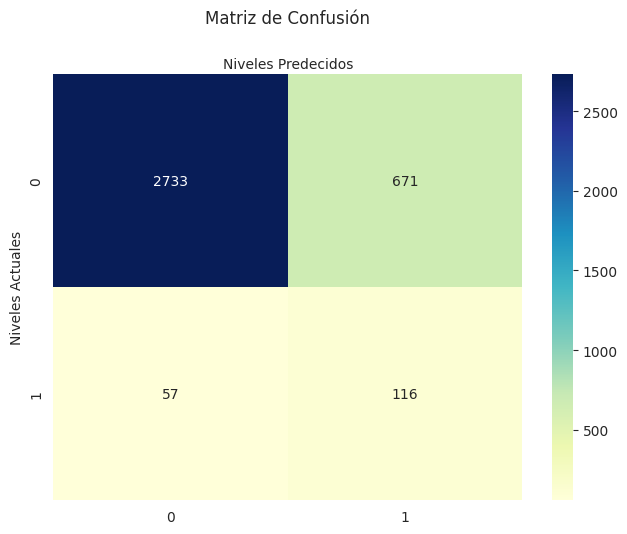

In [52]:
# Visualizando la matriz de confusión usando Heatmap:

from sklearn import metrics

cnf_matrix = confusion_test
# cnf_matrix


# import required modules
plt.figure(figsize=(5,2))
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de Confusión', y=1.1)
plt.ylabel('Niveles Actuales')
plt.xlabel('Niveles Predecidos')

In [53]:
# Comprobando el Accuracy general, en el Test:

print(round(metrics.accuracy_score(dib_test.stroke, dib_test.Stroke_predicted),3))

0.796


In [54]:
# Veamos la sensibilidad de nuestro modelo de regresión logística (en TEST)
round(TP / float(TP+FN), 3)

0.711

In [55]:
# Calculemos la especificidad:
round(TN / float(TN+FP), 3)

0.815

In [56]:
from sklearn.metrics import classification_report
print(classification_report(dib_test.stroke, dib_test.Stroke_predicted))

              precision    recall  f1-score   support

         0.0       0.98      0.80      0.88      3404
         1.0       0.15      0.67      0.24       173

    accuracy                           0.80      3577
   macro avg       0.56      0.74      0.56      3577
weighted avg       0.94      0.80      0.85      3577



In [57]:
dib_test

y_test_pred   age  hypertension  heart_disease  stroke  Stroke_predicted
4688         0.01 31.00             0              0    0.00                 0
4478         0.02 40.00             0              0    0.00                 0
3849         0.00  8.00             0              0    0.00                 0
4355         0.22 79.00             1              0    0.00                 1
3826         0.15 75.00             0              0    0.00                 1
...           ...   ...           ...            ...     ...               ...
284          0.00 14.00             0              0    0.00                 0
686          0.01 32.00             0              0    0.00                 0
703          0.09 66.00             0              0    0.00                 1
3341         0.06 59.00             0              0    0.00                 0
2353         0.00  5.00             0              0    0.00                 0

[3577 rows x 6 columns]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


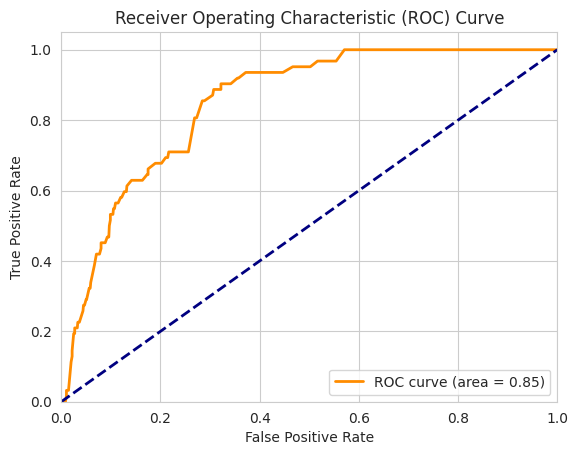

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression # Example model, choose as needed
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have your features in 'X' and target variable in 'y'
# ... (Your code to load and prepare data) ...

# Split data into training and testing sets
# Reshape X to be a 2D array using reshape(-1, 1)
#X_train, X_test, y_train, y_test = train_test_split(X.values.reshape(-1, 1), y, test_size=0.2, random_state=42) # Adjust test_size and random_state as needed
X_train, X_test, y_train, y_test = train_test_split(X[['age','hypertension','heart_disease']], y, test_size=0.2, random_state=42)

# Create and train the model
model = LogisticRegression() # Replace with your desired model
model.fit(X_train, y_train)

# Predecir las probabilidades en el conjunto de prueba
# Reshape X_test to be a 2D array using reshape(-1, 1)
#y_scores = model.predict_proba(X_test.reshape(-1, 1))[:, 1]

#y_scores = model.predict_proba(X_test.values.reshape(-1, 1))[:, 1] #X_test to numpy array
# OR
y_scores = model.predict_proba(X_test[['age','hypertension','heart_disease']].values)[:, 1] # Select the columns

# Calcular los puntos para la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calcular el AUC (Area Under Curve)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## ÁRBOL DE DECISIONES

Accuracy on training set: 0.961
Accuracy on test set: 0.946


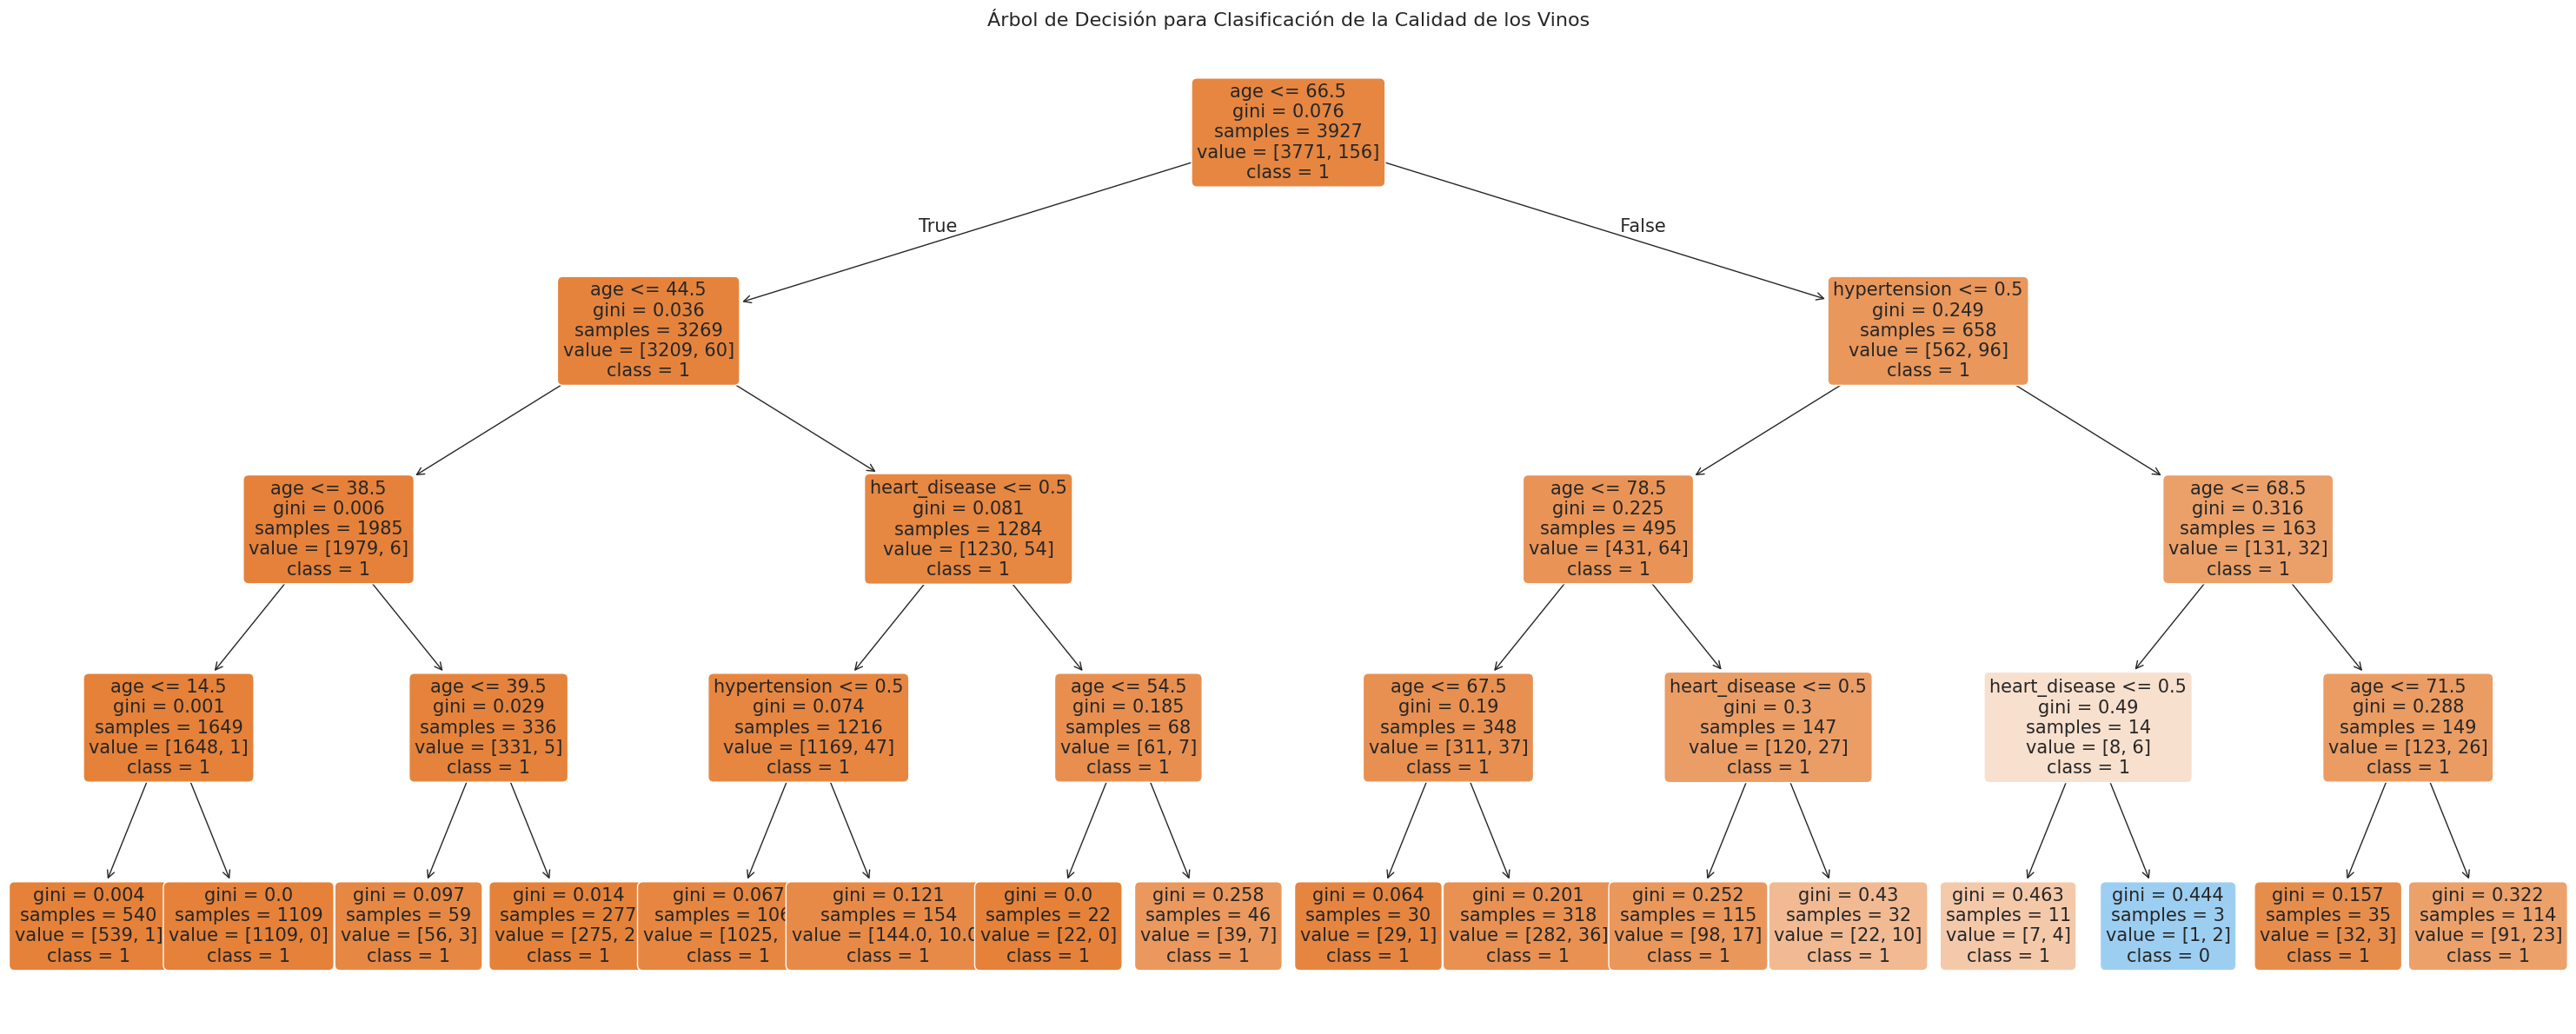

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder

# Cargar el archivo
file_path = "healthcare-dataset-stroke-data.xlsx"
df = pd.read_excel(file_path)

# Eliminar filas con valores nulos (si existen)
df = df.dropna()

#Eliminar duplicados
df = df.drop_duplicates()


# Definir las variables predictoras (X) y la variable objetivo (y)
# Ensure the features used in training and prediction are consistent
X = df[['age','hypertension','heart_disease']]
y = df['stroke']

# Convertir la variable objetivo en numérica si es categórica
le = LabelEncoder()
y = le.fit_transform(y)

# Dividir en conjunto de entrenamiento y prueba
# Use the same X defined above for both training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el árbol de decisión
tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)  # Rename to tree_model for clarity
tree_model.fit(X_train, y_train)

# Now you can use tree_model.score with X_train and X_test
print("Accuracy on training set: {:.3f}".format(tree_model.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree_model.score(X_test, y_test)))

original_class_names = df['stroke'].unique().astype(str)
class_names_mapping = {i: name for i, name in enumerate(original_class_names)}
all_class_names = [class_names_mapping[i] for i in range(len(original_class_names))]

from sklearn.tree import export_graphviz
export_graphviz(tree_model, out_file="tree.dot", class_names=all_class_names,
                feature_names=X.columns, impurity=False, filled=True)

# Ajustar el tamaño del gráfico y evitar superposición
fig, ax = plt.subplots(figsize=(30, 12))  # Crear figura y ejes
plot_tree(tree_model,
          feature_names=X.columns,
          class_names=original_class_names,  # Use original class names
          filled=True,
          rounded=True,
          fontsize=15,  # Fuente legible
          ax=ax)  # Asignar el gráfico al eje creado

import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

plt.title("Árbol de Decisión para Clasificación de la Calidad de los Vinos", fontsize=16)
plt.tight_layout()  # Evitar que el gráfico se monte
plt.show()

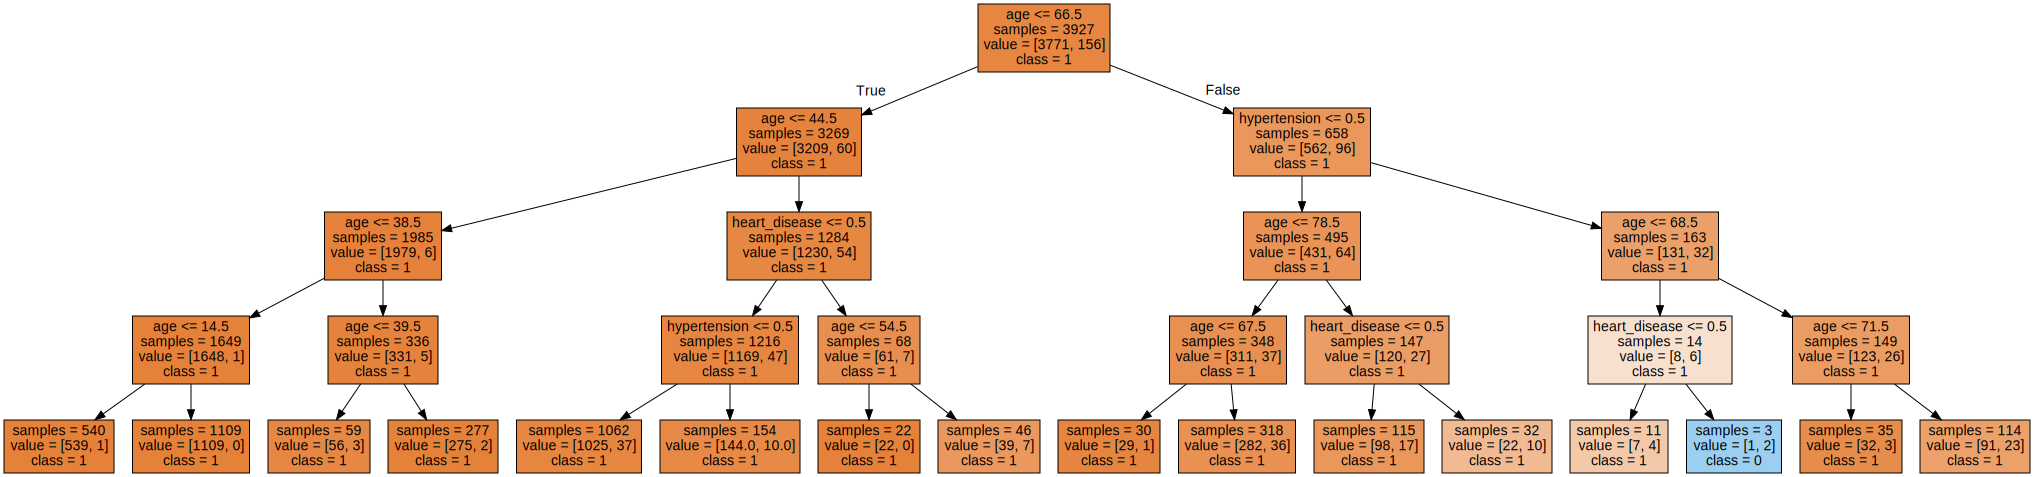

In [199]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

In [200]:
print("Feature importances:\n{}".format(tree_model.feature_importances_))

Feature importances:
[0.87269395 0.04669014 0.08061591]


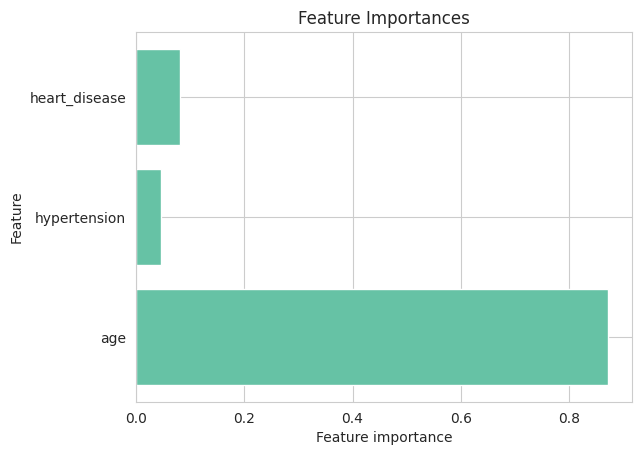

In [201]:
import matplotlib.pyplot as plt
import numpy as np

def plot_feature_importances(model, feature_names):
    """Plots feature importances of a model.

    Args:
        model: The trained model.
        feature_names: List of feature names.
    """
    n_features = len(feature_names)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.title("Feature Importances")
    plt.show()


# Call the function with the correct arguments
plot_feature_importances(tree_model, X.columns)  # Pass tree_model and feature names

Feature importances: [0. 1.]


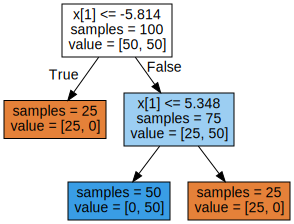

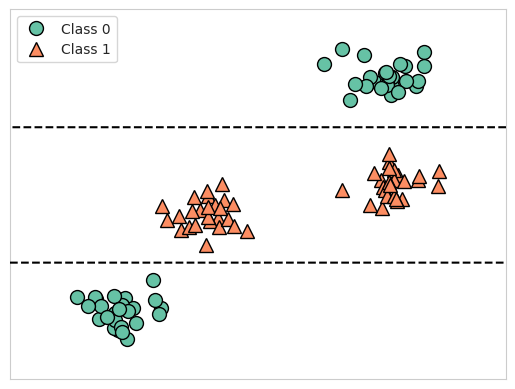

In [202]:
!pip install mglearn
import mglearn
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

In [203]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [204]:
y_pred = tree.predict(X_test)

In [205]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

[[927   2]
 [ 52   1]]


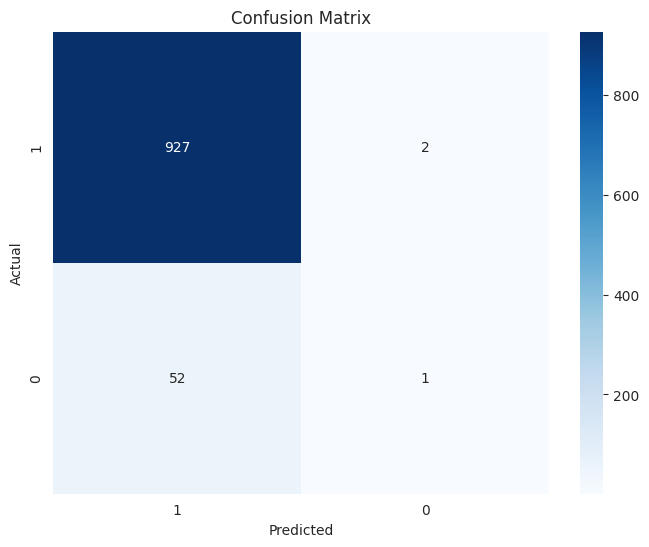

In [206]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calcula la matriz de confusión
class_names = df['stroke'].unique()

# Crea una figura
plt.figure(figsize=(8, 6))

# Crea un mapa de calor de la matriz de confusión
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)

# Añade etiquetas y títulos
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Muestra el gráfico
plt.show()

In [207]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

# Calcula la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)

# Calcula la precisión (accuracy)
accuracy = accuracy_score(y_test, y_pred)

# Calcula la sensibilidad (recall o true positive rate)
sensitivity = recall_score(y_test, y_pred, average='weighted')

# Calcula la especificidad
specificity = confusion[0, 0] / (confusion[0, 0] + confusion[0, 1])

print(f'Accuracy: {accuracy}')
print(f'Sensitivity: {sensitivity}')
print(f'Specificity: {specificity}')

Accuracy: 0.945010183299389
Sensitivity: 0.945010183299389
Specificity: 0.9978471474703983


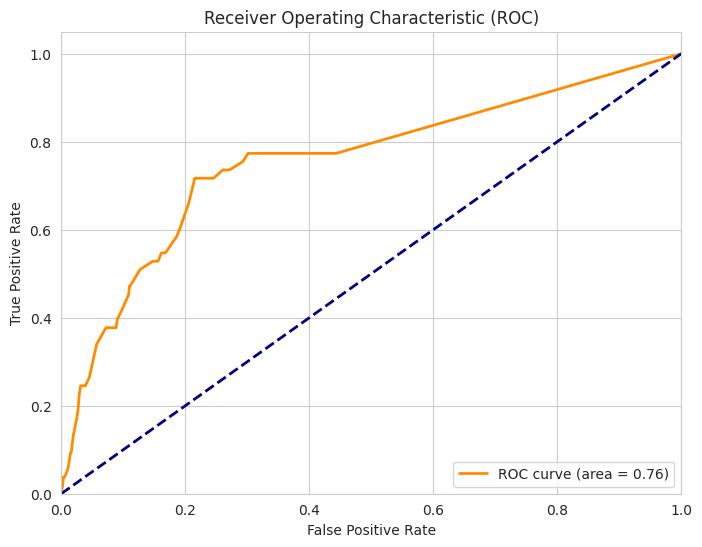

In [208]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


# Entrenar el modelo de árbol de decisión
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Calcular probabilidades de predicción para la clase positiva
y_prob = model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()